# Comparison between the ages for the genders (after controlling for type)

Questions

- What are the differences between the ages for the different genders?
- Do we observe the same changes as globally?

Age effect - General Questions

- What are the differences between the ages?
- Which genes and pathways are differentially expressed between 8w and 52w, between 52w and 104w, between 8w and 104w? Are they the same? Is there a gradient?
- Are they different for the two genders?
- Are they different for the two types?

# Loads

## Libraries and functions

In [219]:
source("load_libraries.R")
options(repr.plot.width=7, repr.plot.height=7)

Allowing multi-threading with up to 4 threads.
[1] "preparing gene to GO mapping data..."
[1] "preparing IC data..."
[1] "preparing gene to GO mapping data..."
[1] "preparing IC data..."
[1] "preparing gene to GO mapping data..."
[1] "preparing IC data..."


In [262]:
source("functions.R")

## Data

In [221]:
load("../results/dge/gene_length.RData")
load("../results/dge/metadata.RData")
load("../results/dge/norm_counts.RData")
load("../results/dge/dge.RData")

In [222]:
load("../results/dge/dge_net.RData")
load("../results/dge/dge_layout.RData")
load("../results/dge/dge_net_connected_gene_colors.RData")
load("../results/dge/dge_net_pal2.RData")

In [223]:
module_nb = length(unique(connected_gene_colors))
#pal2 = c(pal2, "white", "black")

In [224]:
# Interactions between ages and genders (after controlling type)
F_52w_8w = results(dge,contrast= c(0,0,0,0,1,0,0,0,0,1/2), alpha=0.05, test="Wald")
M_52w_8w = results(dge,contrast= c(0,0,0,0,1,0,1,0,0,1/2), alpha=0.05, test="Wald")
F_104w_8w = results(dge,contrast= c(0,0,0,1,0,0,0,0,1/2,0), alpha=0.05, test="Wald")
M_104w_8w = results(dge,contrast= c(0,0,0,1,0,1,0,0,1/2,0), alpha=0.05, test="Wald")
F_104w_52w = results(dge,contrast= c(0,0,0,1,-1,0,0,0,1/2,-1/2), alpha=0.05, test="Wald")
M_104w_52w = results(dge,contrast= c(0,0,0,1,-1,1,-1,0,1/2,-1/2), alpha=0.05, test="Wald")

In [225]:
M_samples = c(
    'SPF_8w_M_1_2','SPF_8w_M_2_2','SPF_8w_M_3_2','SPF_8w_M_4_2','GF_8w_M_1_2','GF_8w_M_2_2','GF_8w_M_3_2','GF_8w_M_4_2',
    'SPF_52w_M_1_2','SPF_52w_M_2_2','SPF_52w_M_3_2','SPF_52w_M_4_2','SPF_52w_M_5_2','GF_52w_M_1_2','GF_52w_M_2_2','GF_52w_M_3_2','GF_52w_M_4_2',
    'SPF_104w_M_1_2','SPF_104w_M_2_2','SPF_104w_M_3_2','SPF_104w_M_4_2','SPF_104w_M_5_2','SPF_104w_M_6_2','SPF_104w_M_7_2','SPF_104w_M_8_2','SPF_104w_M_9_2','SPF_104w_M_10_2','SPF_104w_M_11_2','SPF_104w_M_12_2','SPF_104w_M_13_2','SPF_104w_M_14_2','GF_104w_M_1_2','GF_104w_M_2_2')
F_samples = c(
    'SPF_8w_F_1_2','SPF_8w_F_3_2','SPF_8w_F_4_2','SPF_8w_F_5_2','GF_8w_F_1_2','GF_8w_F_2_2','GF_8w_F_3_2','GF_8w_F_4_2','GF_8w_F_5_2',
    'SPF_52w_F_1_2','SPF_52w_F_2_2','SPF_52w_F_3_2','SPF_52w_F_4_2','SPF_52w_F_5_2','SPF_52w_F_6_2','GF_52w_F_1_2','GF_52w_F_2_2','GF_52w_F_3_2','GF_52w_F_4_2','GF_52w_F_5_2','GF_52w_F_6_2',
    'SPF_104w_F_1_2','SPF_104w_F_2_2','SPF_104w_F_3_2','GF_104w_F_1_2','GF_104w_F_2_2','GF_104w_F_3_2')
annot = as.data.frame(colData(dge)[, c("age", "type")])
to_comp = c("52w VS 8w (F)","52w VS 8w (M)", "104w VS 52w (F)", "104w VS 52w (M)", "104w VS 8w (F)", "104w VS 8w (M)")

In [226]:
norm_counts_wo_out = counts(dge, normalized=T, replaced = T)
norm_counts_wo_out = norm_counts_wo_out[apply(norm_counts_wo_out, 1, sum) != 0,]
mean_counts = apply(norm_counts_wo_out, 1, mean)
sd_counts = apply(norm_counts_wo_out, 1, sd)
z_scores = (norm_counts_wo_out - mean_counts)/sd_counts
# z_score higher than 3.5 or smaller than -3.5
s = cbind(apply(z_scores > 3.5, 2, sum, na.rm = T), apply(z_scores < -3.5, 2, sum, na.rm = T))
s_perc = 100 * s/dim(norm_counts_wo_out)[1]
apply(s,2,sum)
apply(s_perc,2,min)
apply(s_perc,2,max)

[1] 14447    88

[1] 0.3609066 0.0000000

[1] 4.845773 0.216544

In [227]:
tga_col_order = c(grep("GF_8w_M_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("GF_52w_M_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("GF_104w_M_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("GF_8w_F_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("GF_52w_F_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("GF_104w_F_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("SPF_8w_M_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("SPF_52w_M_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("SPF_104w_M_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("SPF_8w_F_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("SPF_52w_F_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("SPF_104w_F_+", colnames(norm_counts), perl=TRUE, value=TRUE))
tga_annot_col = as.data.frame(colData(dge)[, c("age","gender", "type")])
tga_annot_col$age = factor(tga_annot_col$age,c("8w", "52w", "104w"))
gat_col_order = c(grep("SPF_8w_M_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("GF_8w_M_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("SPF_52w_M_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("GF_52w_M_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("SPF_104w_M_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("GF_104w_M_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("SPF_8w_F_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("GF_8w_F_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("SPF_52w_F_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("GF_52w_F_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("SPF_104w_F_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("GF_104w_F_+", colnames(norm_counts), perl=TRUE, value=TRUE))
gat_annot_col = as.data.frame(colData(dge)[, c("type", "age","gender")])
gat_annot_col$age = factor(gat_annot_col$age,c("8w", "52w", "104w"))

# Differentially expressed genes

In [228]:
age_gender_data = list(F_52w_8w, M_52w_8w, F_104w_52w, M_104w_52w, F_104w_8w, M_104w_8w)
names(age_gender_data) = to_comp
age_gender_deg = extract_diff_expr_genes(age_gender_data, "age-effect/age_gender/")

Warning message in pcls(G):
“initial point very close to some inequality constraints”Warning message in pcls(G):
“initial point very close to some inequality constraints”Warning message in pcls(G):
“initial point very close to some inequality constraints”Warning message in pcls(G):
“initial point very close to some inequality constraints”Warning message in pcls(G):
“initial point very close to some inequality constraints”Warning message in pcls(G):
“initial point very close to some inequality constraints”Warning message in stack.default(getgo(rownames(l$sign_fc_deg), "mm10", "geneSymbol")):
“non-vector elements will be ignored”Warning message in stack.default(getgo(rownames(as.data.frame(l$deg)), "mm10", "geneSymbol", :
“non-vector elements will be ignored”

# Stats

All DEG (Wald padj < 0.05)
52w VS 8w (F)   2115                      
52w VS 8w (M)    393                      
104w VS 52w (F)  239                      
104w VS 52w (M) 3848                      
104w VS 8w (F)  1715                      
104w VS 8w (M)  4189                      
                All over-expressed genes (Wald padj < 0.05 & FC > 0)
52w VS 8w (F)   1190                                                
52w VS 8w (M)    252                                                
104w VS 52w (F)  146                                                
104w VS 52w (M) 2017                                                
104w VS 8w (F)  1020                                                
104w VS 8w (M)  2206                                                
                All under-expressed genes (Wald padj < 0.05 & FC < 0)
52w VS 8w (F)    925                                                 
52w VS 8w (M)    141                                                 
104w VS 52w (F)   93                                                 
104w VS 52w (M) 1831                                                 
104w VS 8w (F)   695                                                 
104w VS 8w (M)  1983                                                 
                DEG (Wald padj < 0.05 & abs(FC) >= 1.5)
52w VS 8w (F)    881                                   
52w VS 8w (M)    248                                   
104w VS 52w (F)  159                                   
104w VS 52w (M) 1420                                   
104w VS 8w (F)   915                                   
104w VS 8w (M)  1884                                   
                Over-expressed genes (Wald padj < 0.05 & FC >= 1.5)
52w VS 8w (F)   625                                                
52w VS 8w (M)   182                                                
104w VS 52w (F) 115                                                
104w VS 52w (M) 394                                                
104w VS 8w (F)  696                                                
104w VS 8w (M)  762                                                
                Under-expressed genes (Wald padj < 0.05 & FC <= -1.5)
52w VS 8w (F)    256                                                 
52w VS 8w (M)     66                                                 
104w VS 52w (F)   44                                                 
104w VS 52w (M) 1026                                                 
104w VS 8w (F)   219                                                 
104w VS 8w (M)  1122

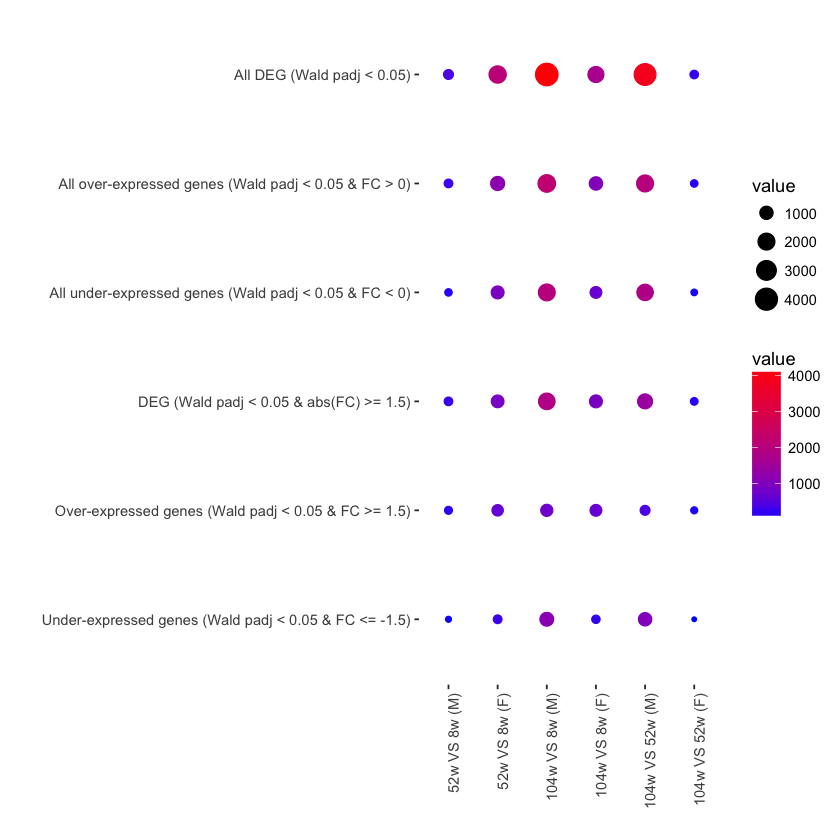

In [229]:
age_gender_deg$stat
plot_stat_mat(age_gender_deg$stat)

## All DEG (Wald padj < 0.05)

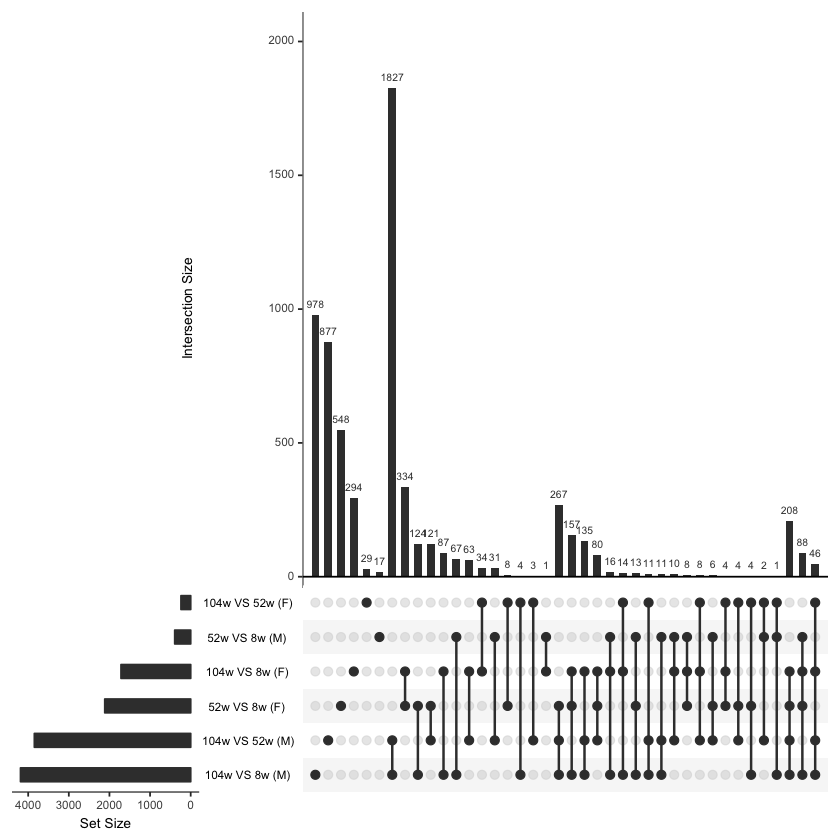

In [230]:
# Differentially expressed genes
upset(as.data.frame(age_gender_deg$deg),nsets = 6)

Some explanation (specially for the gender difference in microglia aging)
![](../results/dge/age-effect/age_gender/gender_difference_aging_hist_explanation.png)

## DEG (Wald padj < 0.05 & abs(FC) > 1.5)

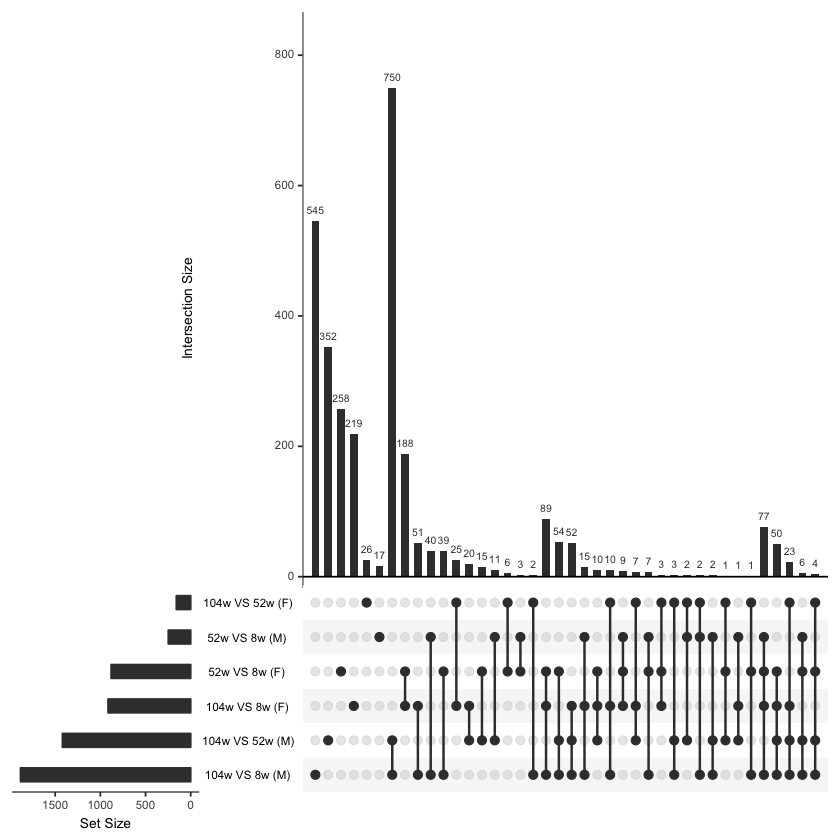

In [231]:
upset(as.data.frame(1*(!is.na(age_gender_deg$sign_fc_deg))),nsets = 6)

# DEG (Wald padj < 0.05 & abs(FC) > 1.5)

## Log2FC

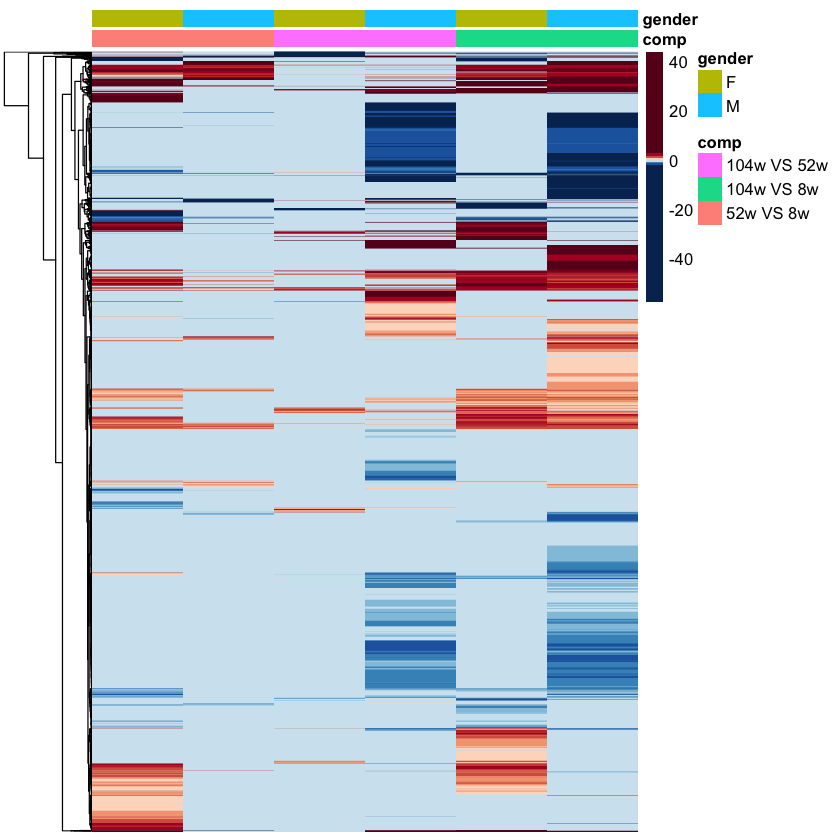

In [232]:
fc_annot = data.frame(comp = c(rep("52w VS 8w",2), rep("104w VS 52w",2),rep("104w VS 8w",2)),
              gender = rep(c("F","M"),3))
rownames(fc_annot) = colnames(age_gender_deg$sign_fc_deg)
plot_fc_heatmap(age_gender_deg$sign_fc_deg, fc_annot)

## Z-score

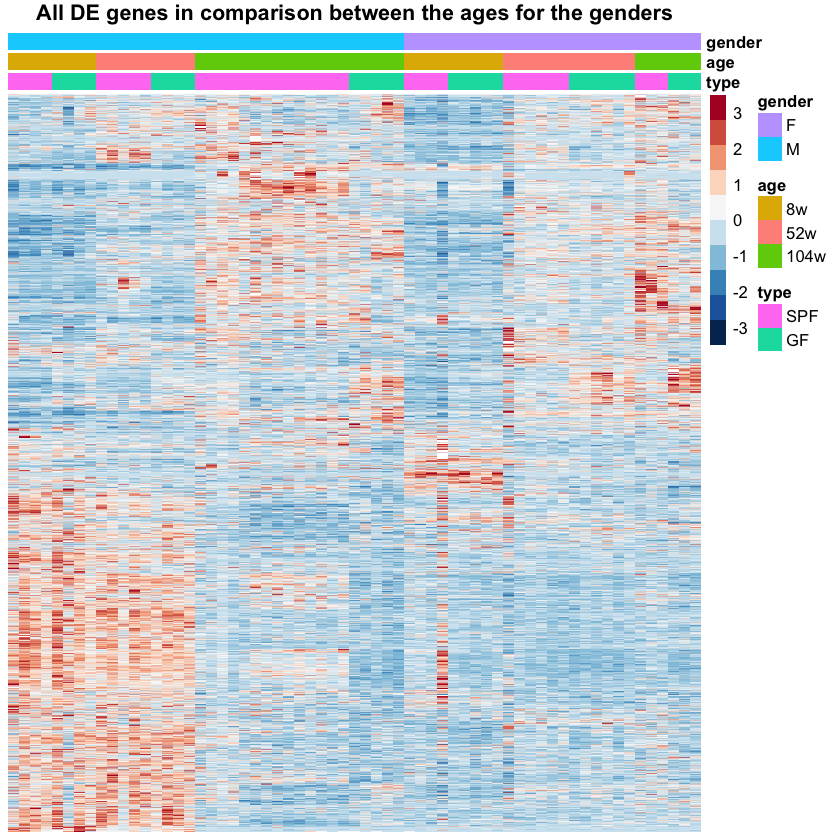

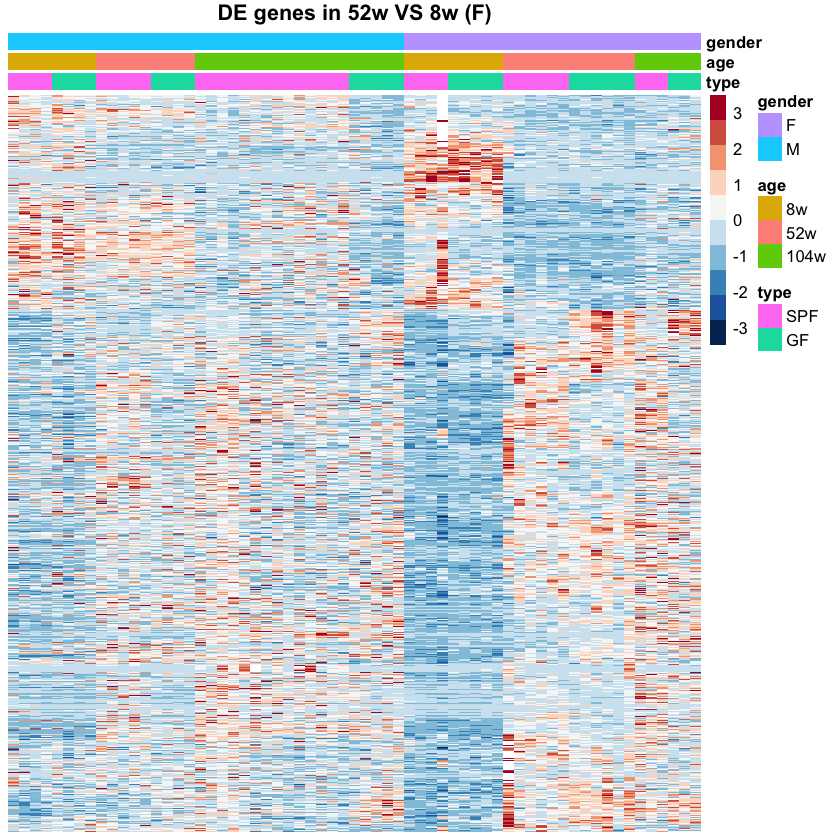

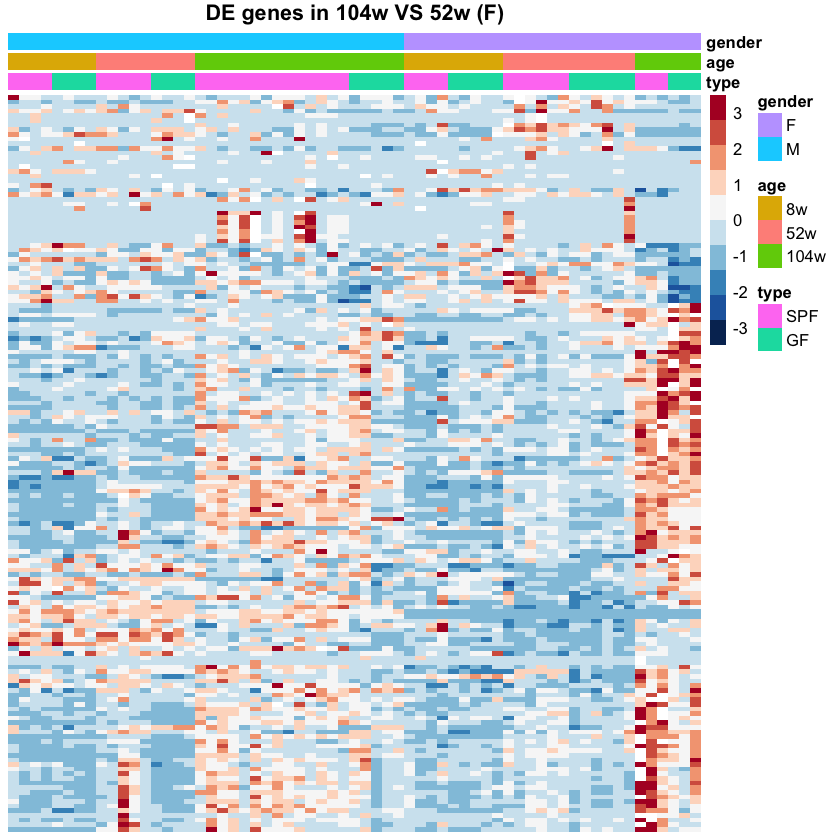

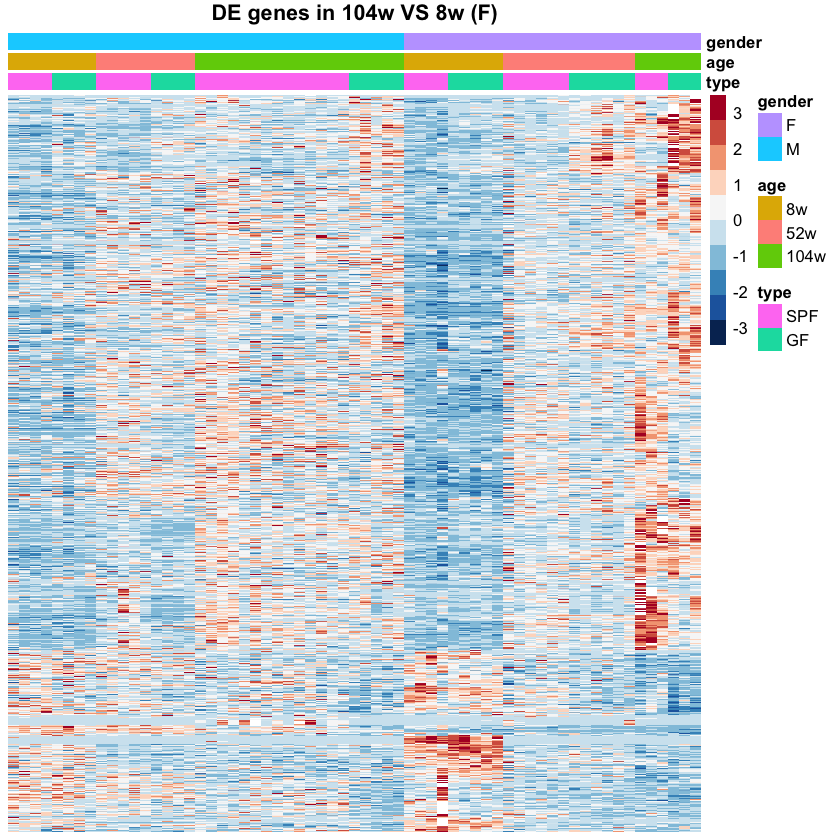

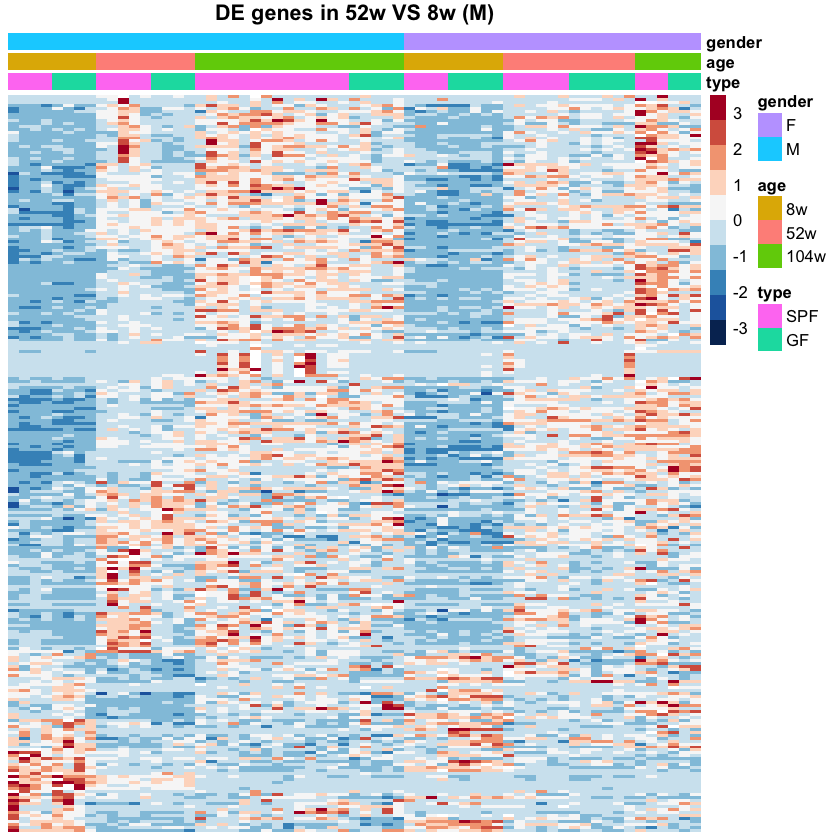

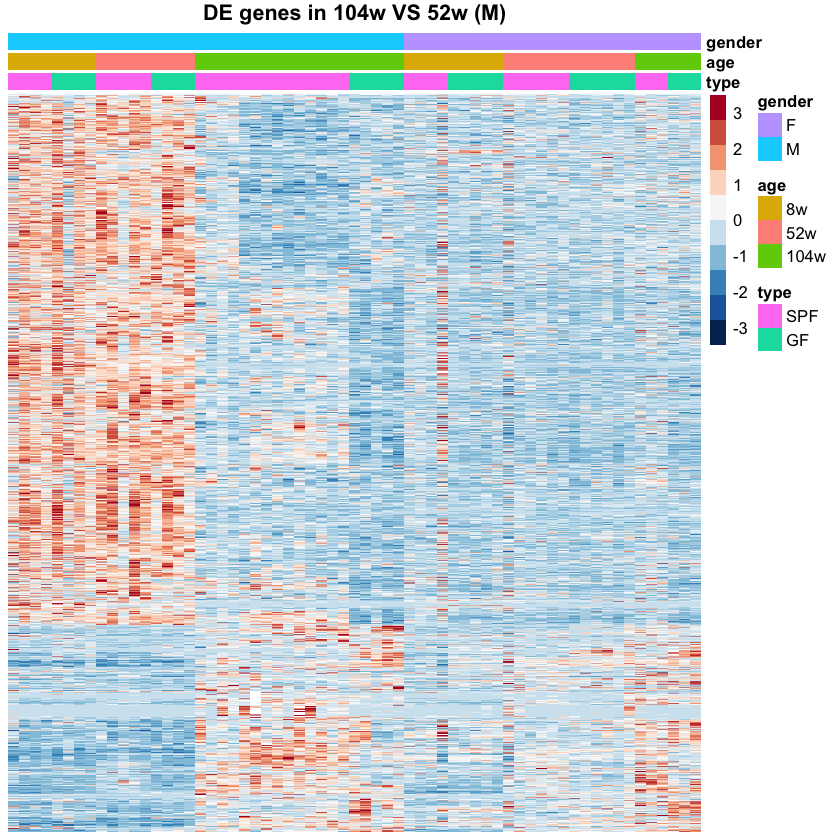

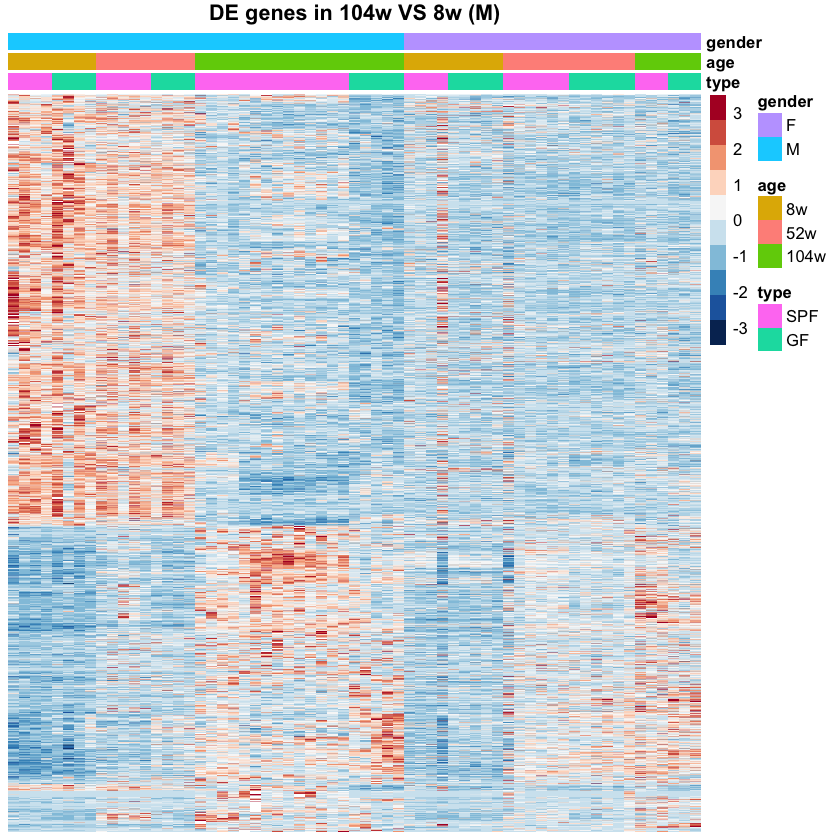

In [233]:
plot_z_score_heatmap(z_scores,
                     rownames(age_gender_deg$sign_fc_deg),
                     gat_col_order,
                     gat_annot_col,
                     "All DE genes in comparison between the ages for the genders",
                     gat_col_order)

comps = list(
    "52w VS 8w (F)" = c(grep("SPF_8w_F_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("GF_8w_F_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("SPF_52w_F_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("GF_52w_F_+", colnames(norm_counts), perl=TRUE, value=TRUE)),
    "104w VS 52w (F)" = c(grep("SPF_52w_F_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("GF_52w_F_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("SPF_104w_F_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("GF_104w_F_+", colnames(norm_counts), perl=TRUE, value=TRUE)),
    "104w VS 8w (F)" = c(grep("SPF_8w_F_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("GF_8w_F_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("SPF_104w_F_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("GF_104w_F_+", colnames(norm_counts), perl=TRUE, value=TRUE)),
    "52w VS 8w (M)" = c(grep("SPF_8w_M_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("GF_8w_M_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("SPF_52w_M_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("GF_52w_M_+", colnames(norm_counts), perl=TRUE, value=TRUE)),
    "104w VS 52w (M)" = c(grep("SPF_52w_M_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("GF_52w_M_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("SPF_104w_M_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("GF_104w_M_+", colnames(norm_counts), perl=TRUE, value=TRUE)),
    "104w VS 8w (M)" = c(grep("SPF_8w_M_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("GF_8w_M_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("SPF_104w_M_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("GF_104w_M_+", colnames(norm_counts), perl=TRUE, value=TRUE))    
)

for(comp in names(comps)){
    plot_z_score_heatmap(z_scores,
                     rownames(age_gender_deg$sign_fc_deg)[!is.na(age_gender_deg$sign_fc_deg[,comp])],
                     gat_col_order,
                     gat_annot_col,
                     paste("DE genes in", comp),
                     comps[[comp]])
}

# Co-expression (WGCNA)

## DEG into gene co-expression network

- White: up-regulated 
- Black: down-regulated


Comp | Male | Female
--- | --- | ---
52w vs 8w | |
104w vs 52w | |
104w vs 8w | |

In [234]:
#par(mfrow=c(3,2),mar=c(0,0,0,0))
#col_52w_vs_8w_F = get_deg_colors(age_gender_deg, "52w VS 8w (M)", connected_gene_colors, module_nb)
#plot_net_with_layout(net, col_52w_vs_8w_F, pal2, layout, add_legend = FALSE)
#col_52w_vs_8w_M = get_deg_colors(age_gender_deg, "52w VS 8w (F)", connected_gene_colors, module_nb)
#plot_net_with_layout(net, col_52w_vs_8w_M, pal2, layout, add_legend = FALSE)
#col_104w_vs_52w_F = get_deg_colors(age_gender_deg, "104w VS 52w (M)", connected_gene_colors, module_nb)
#plot_net_with_layout(net, col_104w_vs_52w_F, pal2, layout, add_legend = FALSE)
#col_104w_vs_52w_M = get_deg_colors(age_gender_deg, "104w VS 52w (F)", connected_gene_colors, module_nb)
#plot_net_with_layout(net, col_104w_vs_52w_M, pal2, layout, add_legend = FALSE)
#col_104w_vs_8w_F = get_deg_colors(age_gender_deg, "104w VS 8w (M)", connected_gene_colors, module_nb)
#plot_net_with_layout(net, col_104w_vs_8w_F, pal2, layout, add_legend = FALSE)
#col_104w_vs_8w_M = get_deg_colors(age_gender_deg, "104w VS 8w (F)", connected_gene_colors, module_nb)
#plot_net_with_layout(net, col_104w_vs_8w_M, pal2, layout, add_legend = FALSE)

## Z-score in modules

In [235]:
mod_pal = pal2
names(mod_pal) = paste("ME", names(pal2), sep='')
names(mod_pal) = replace(names(mod_pal), which(names(mod_pal) == 'ME0'), "No module")
annot_colors = list(
    module = mod_pal
)

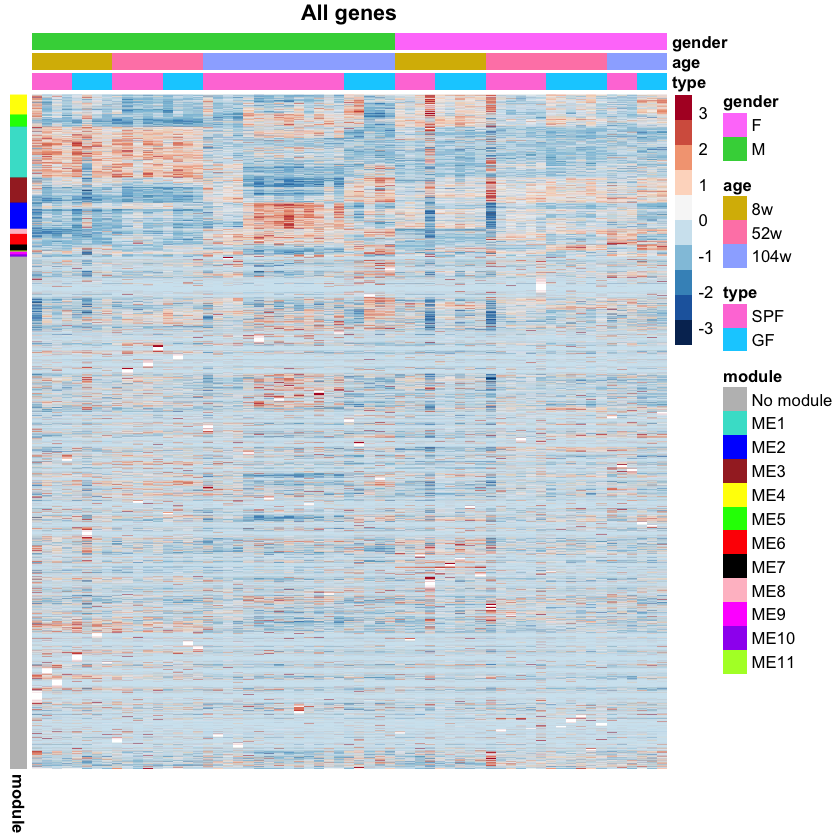

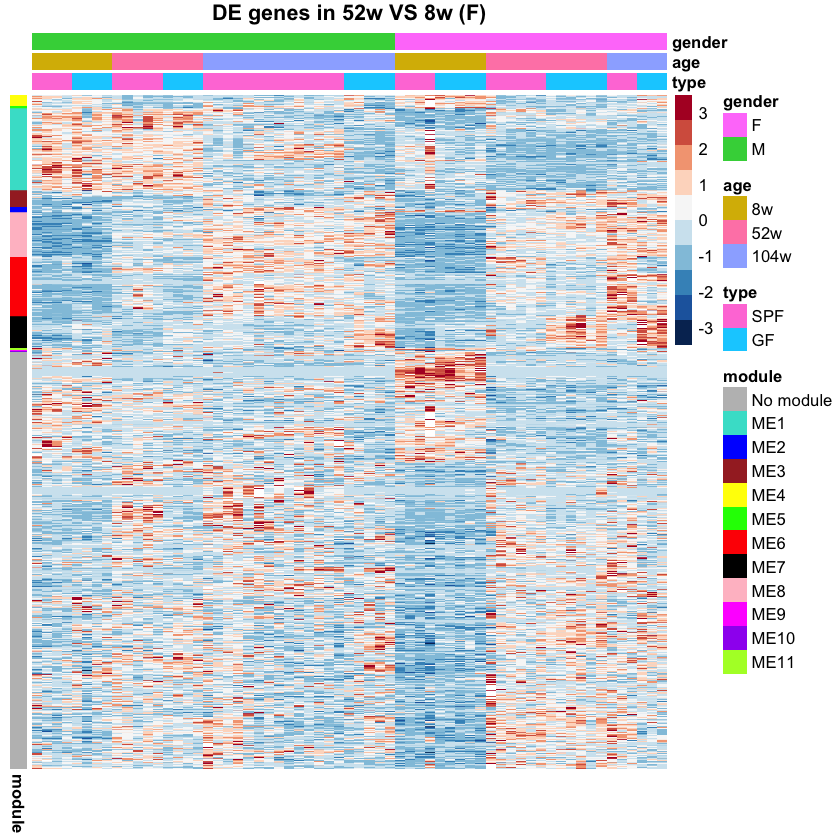

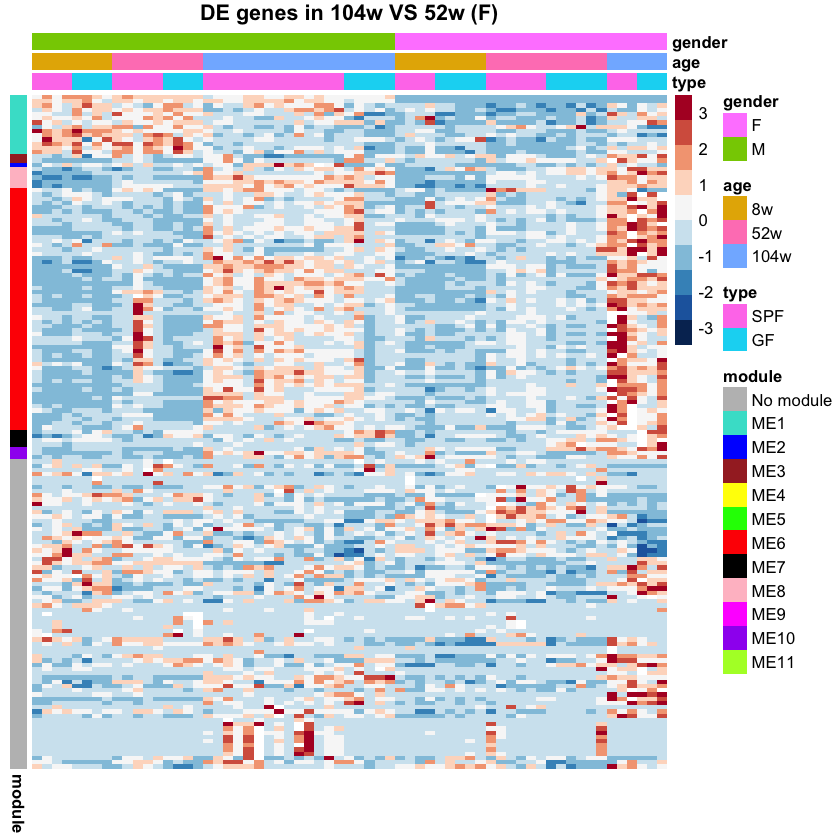

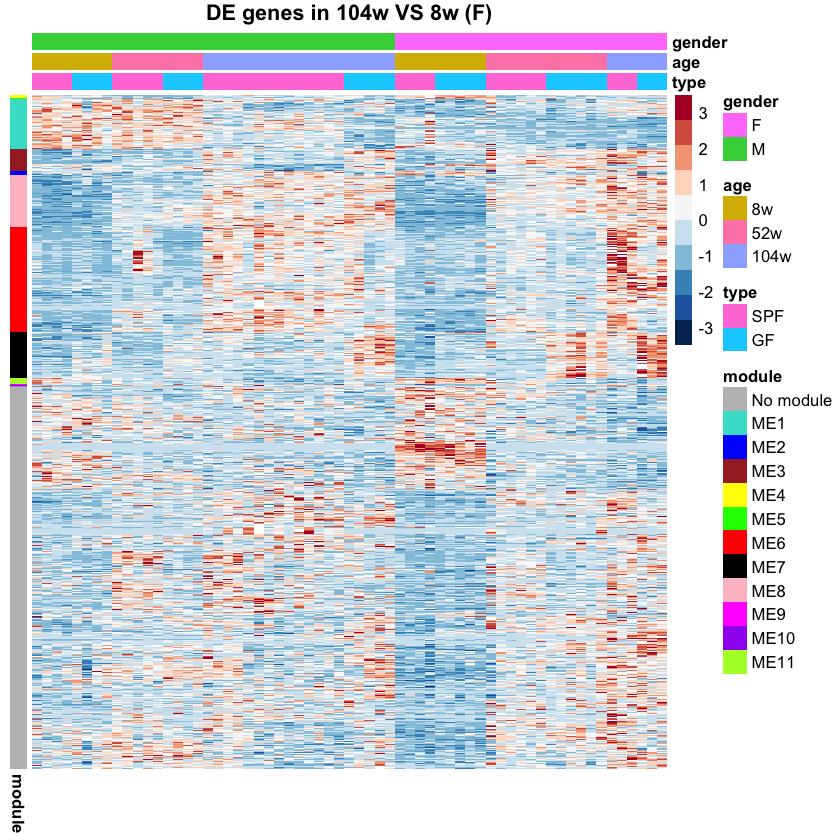

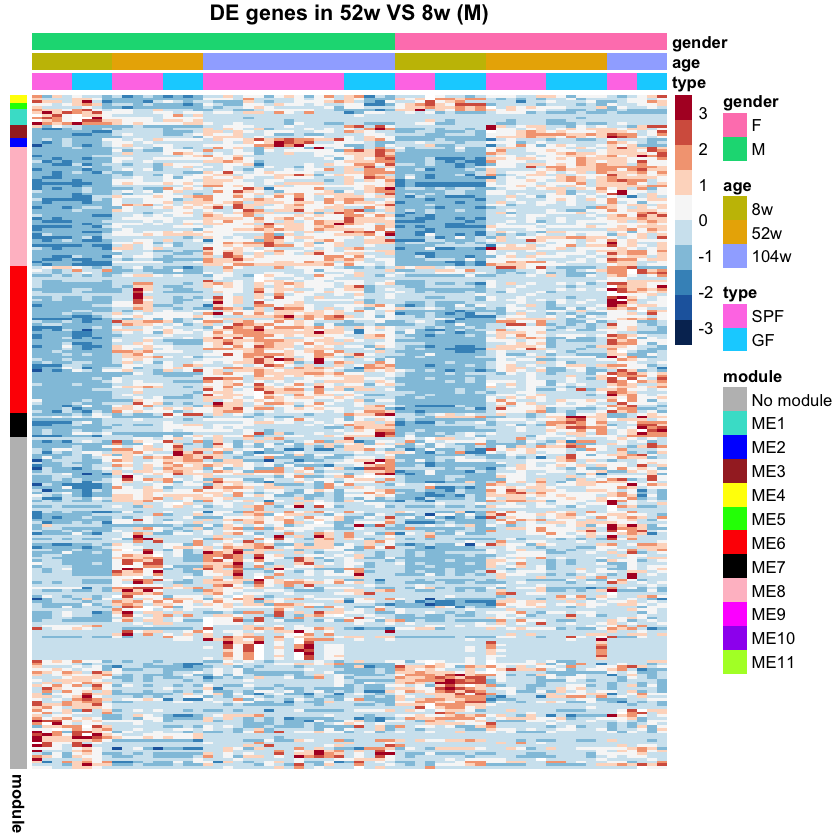

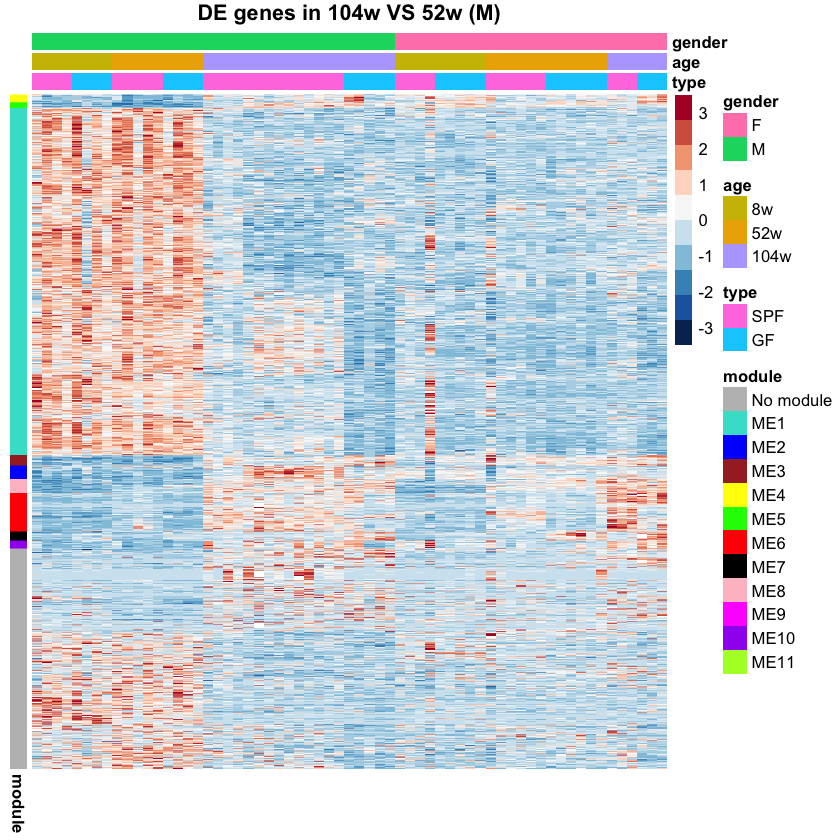

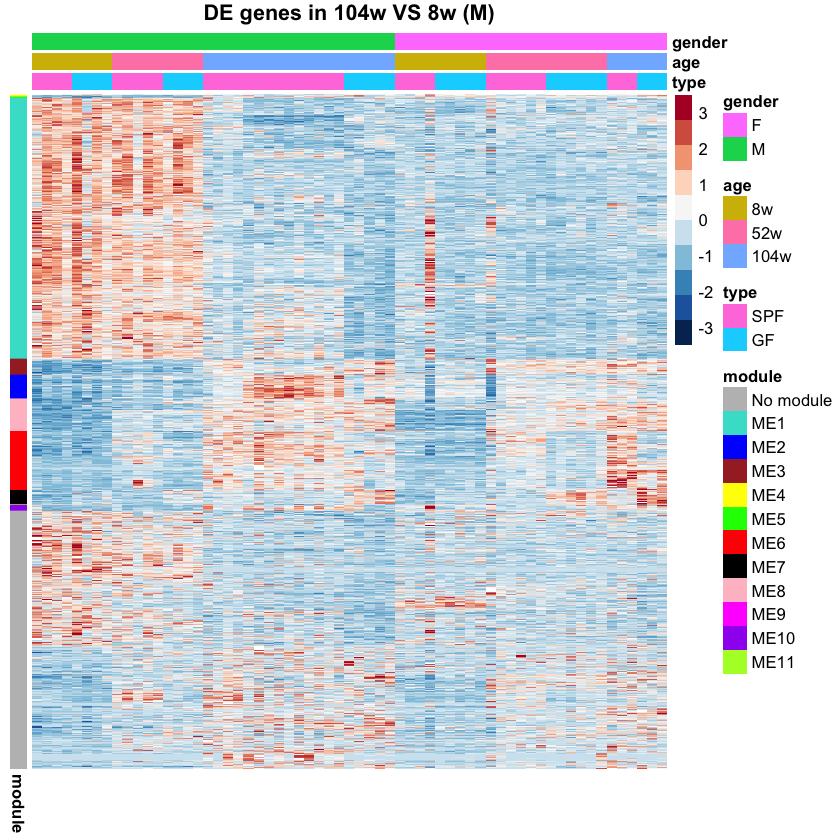

In [236]:
plot_z_score_heatmap_with_modules(z_scores,
                                  rownames(z_scores),
                                  gat_col_order,
                                  gat_annot_col,
                                  "All genes")
comps = list(
    "52w VS 8w (F)" = c(grep("SPF_8w_F_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("GF_8w_F_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("SPF_52w_F_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("GF_52w_F_+", colnames(norm_counts), perl=TRUE, value=TRUE)),
    "104w VS 52w (F)" = c(grep("SPF_52w_F_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("GF_52w_F_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("SPF_104w_F_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("GF_104w_F_+", colnames(norm_counts), perl=TRUE, value=TRUE)),
    "104w VS 8w (F)" = c(grep("SPF_8w_F_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("GF_8w_F_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("SPF_104w_F_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("GF_104w_F_+", colnames(norm_counts), perl=TRUE, value=TRUE)),
    "52w VS 8w (M)" = c(grep("SPF_8w_M_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("GF_8w_M_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("SPF_52w_M_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("GF_52w_M_+", colnames(norm_counts), perl=TRUE, value=TRUE)),
    "104w VS 52w (M)" = c(grep("SPF_52w_M_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("GF_52w_M_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("SPF_104w_M_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("GF_104w_M_+", colnames(norm_counts), perl=TRUE, value=TRUE)),
    "104w VS 8w (M)" = c(grep("SPF_8w_M_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("GF_8w_M_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("SPF_104w_M_+", colnames(norm_counts), perl=TRUE, value=TRUE),
                  grep("GF_104w_M_+", colnames(norm_counts), perl=TRUE, value=TRUE))    
)

for(comp in names(comps)){
    plot_z_score_heatmap_with_modules(z_scores,
                                     rownames(age_gender_deg$sign_fc_deg)[!is.na(age_gender_deg$sign_fc_deg[,comp])],
                                     gat_col_order,
                                     gat_annot_col,
                                     paste("DE genes in", comp))
}

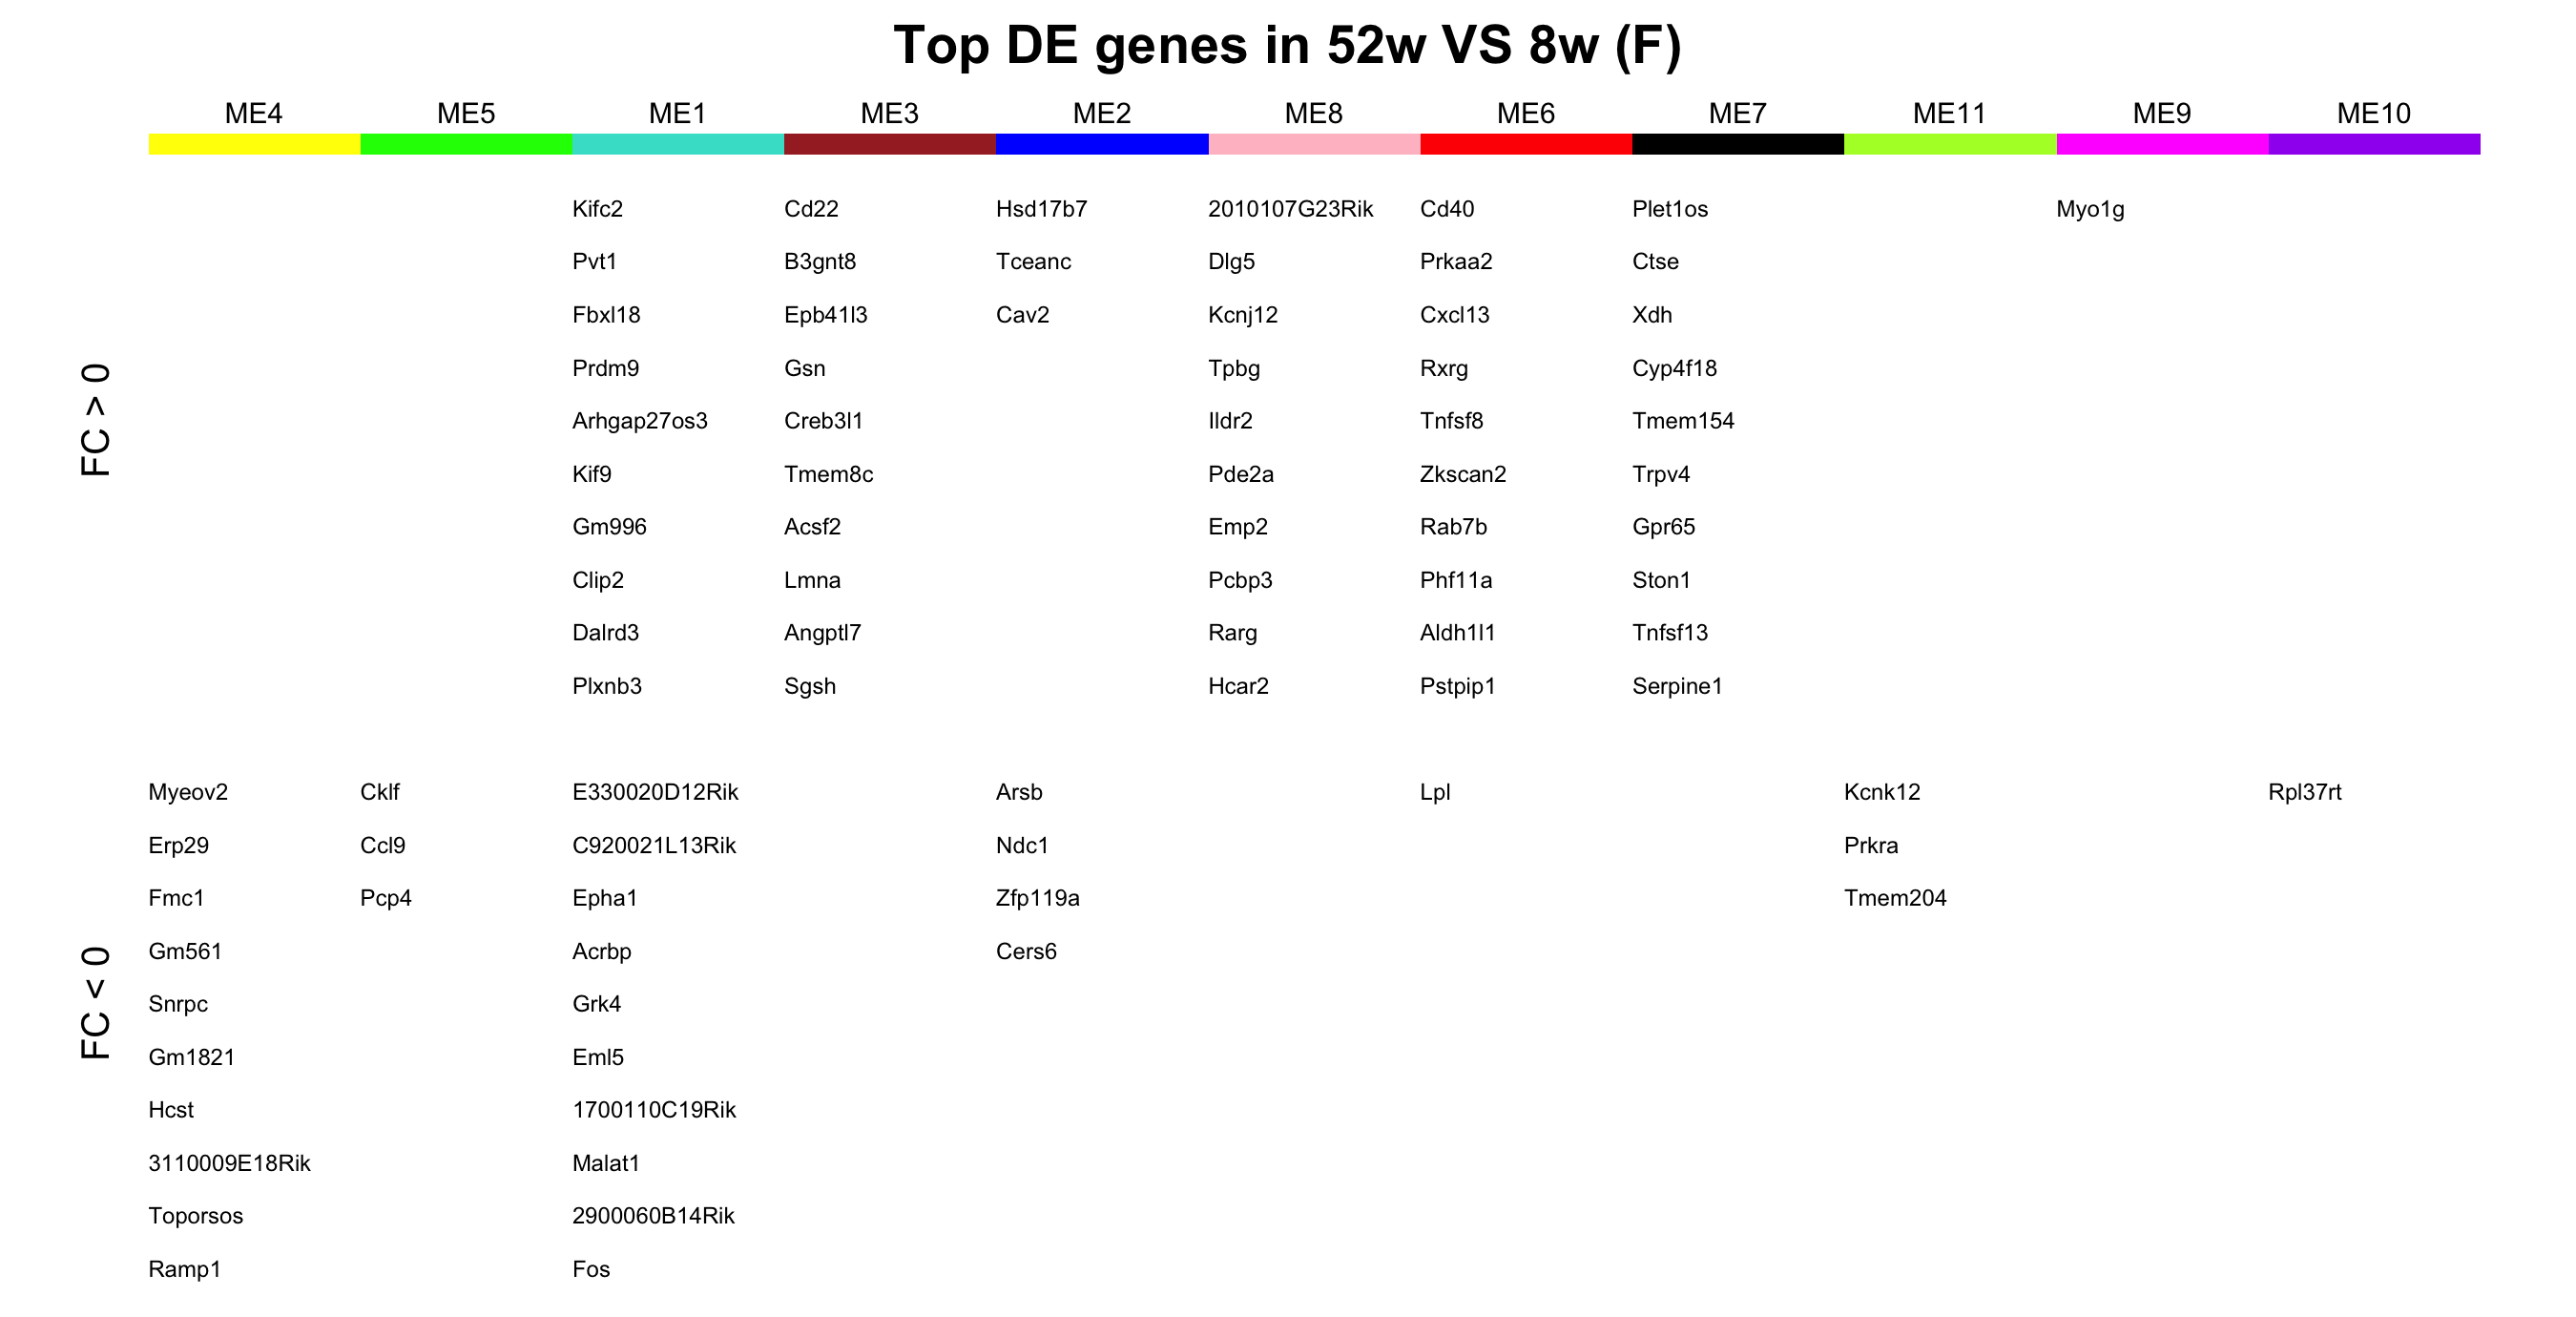

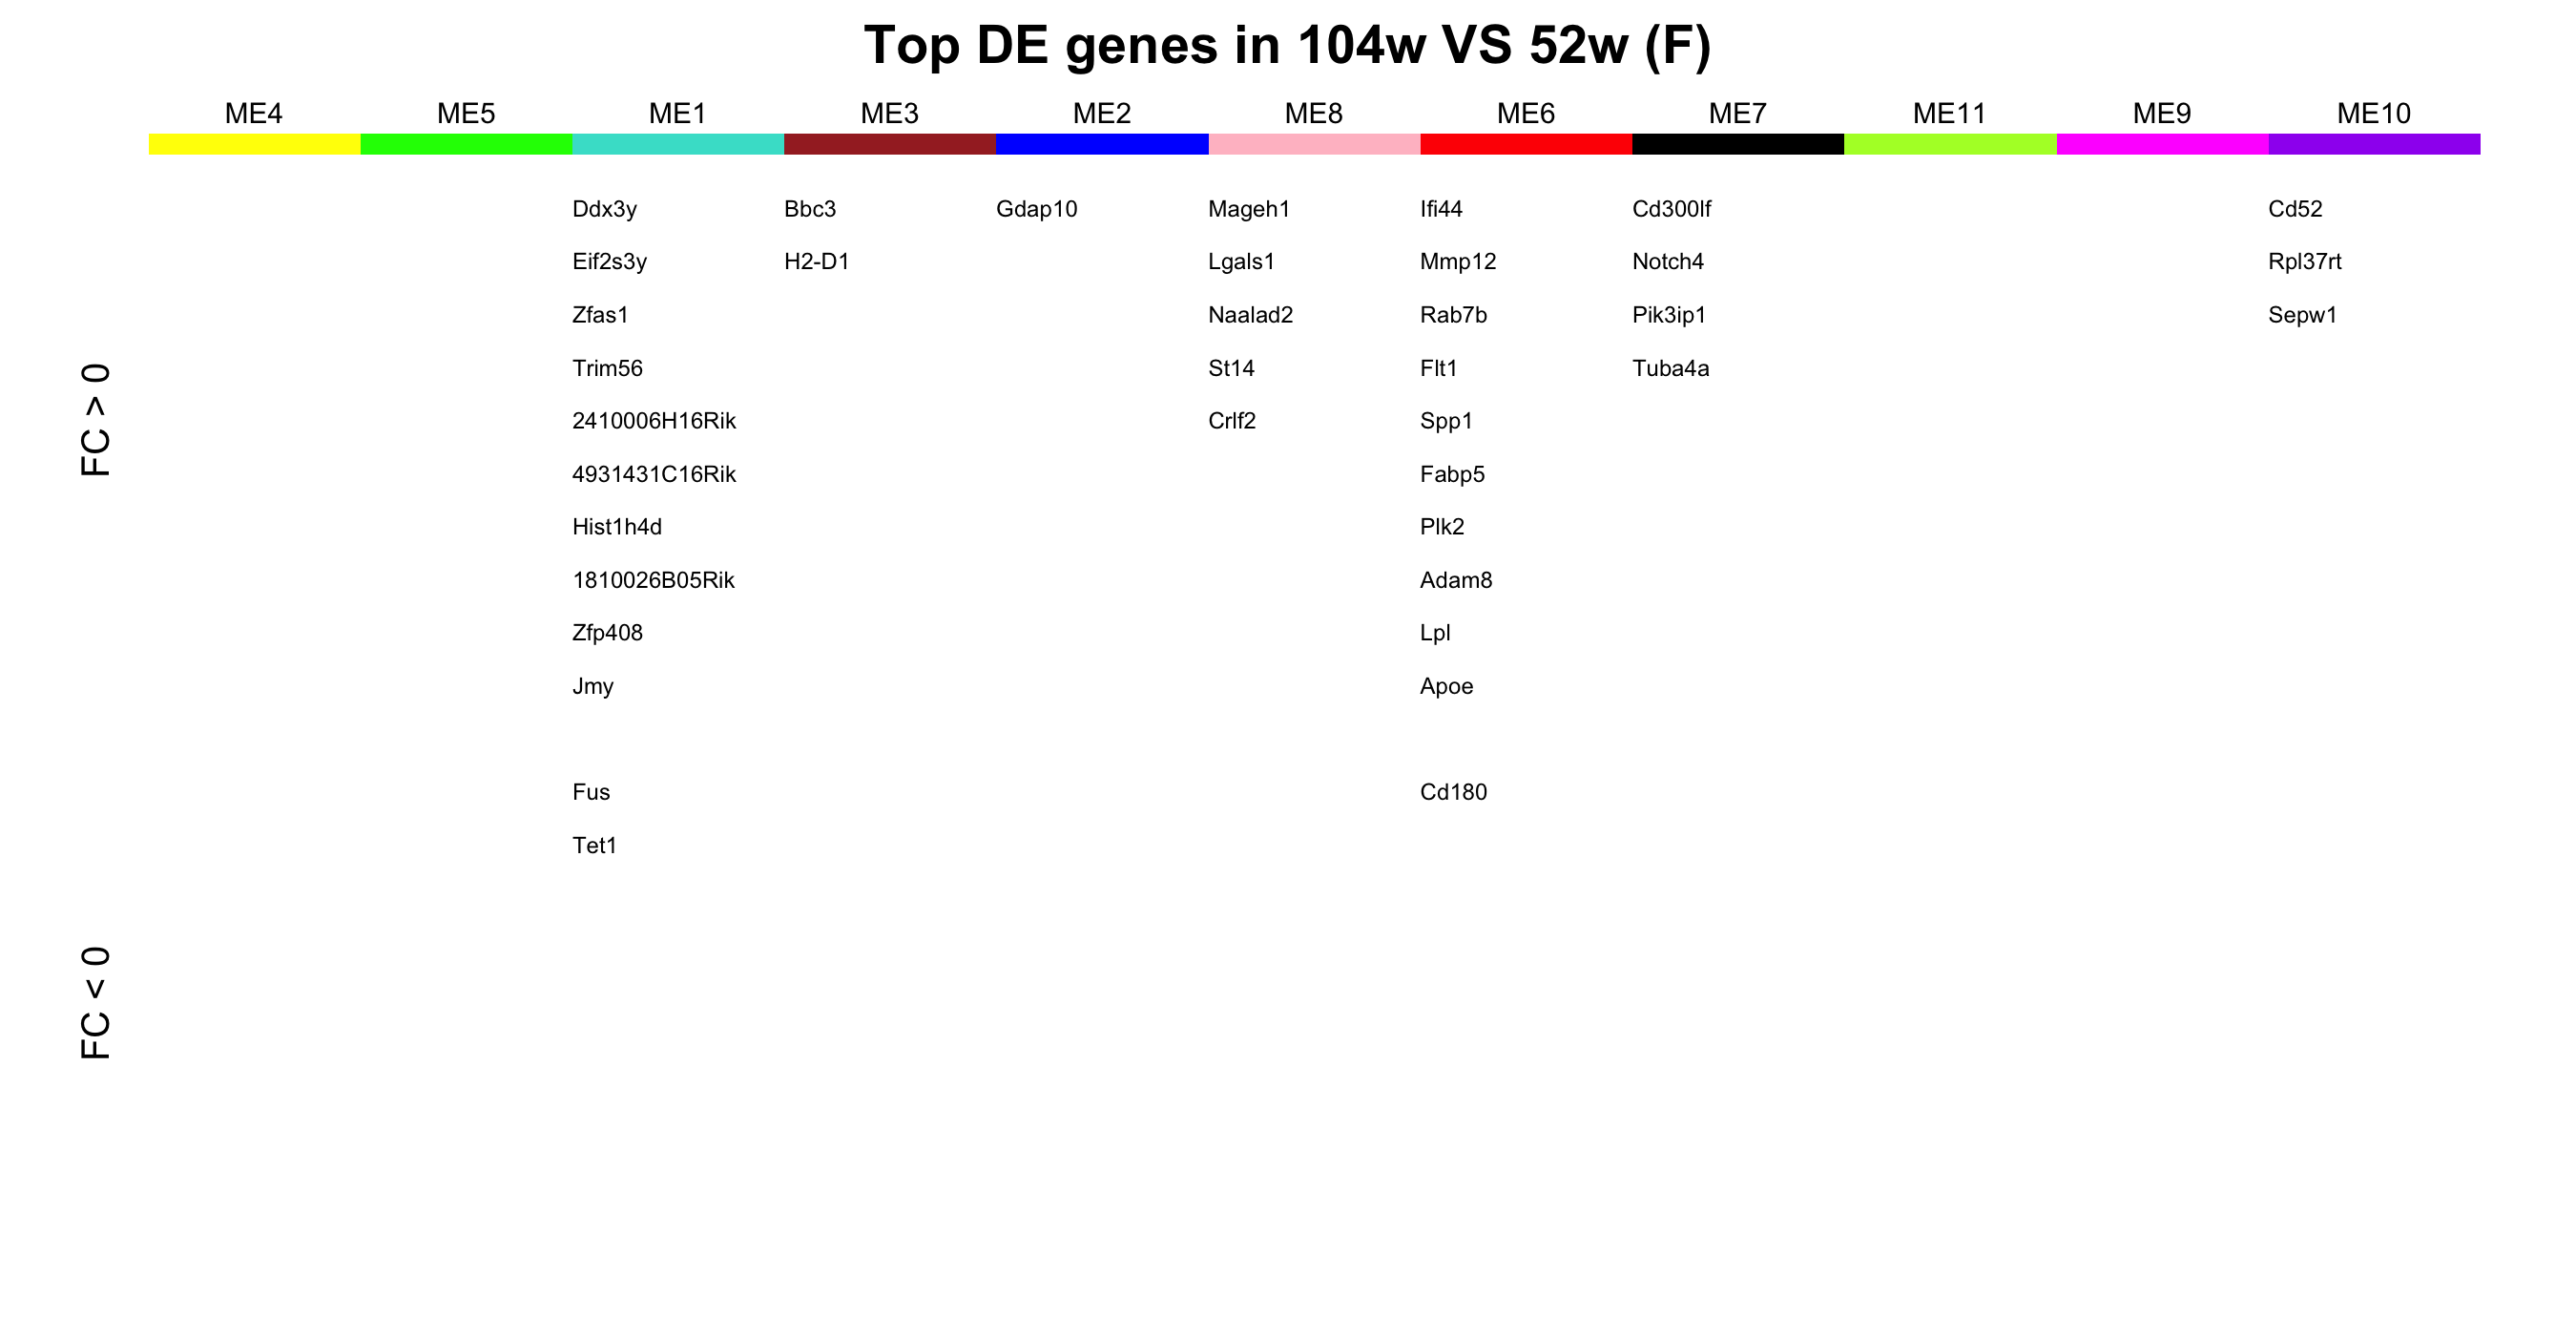

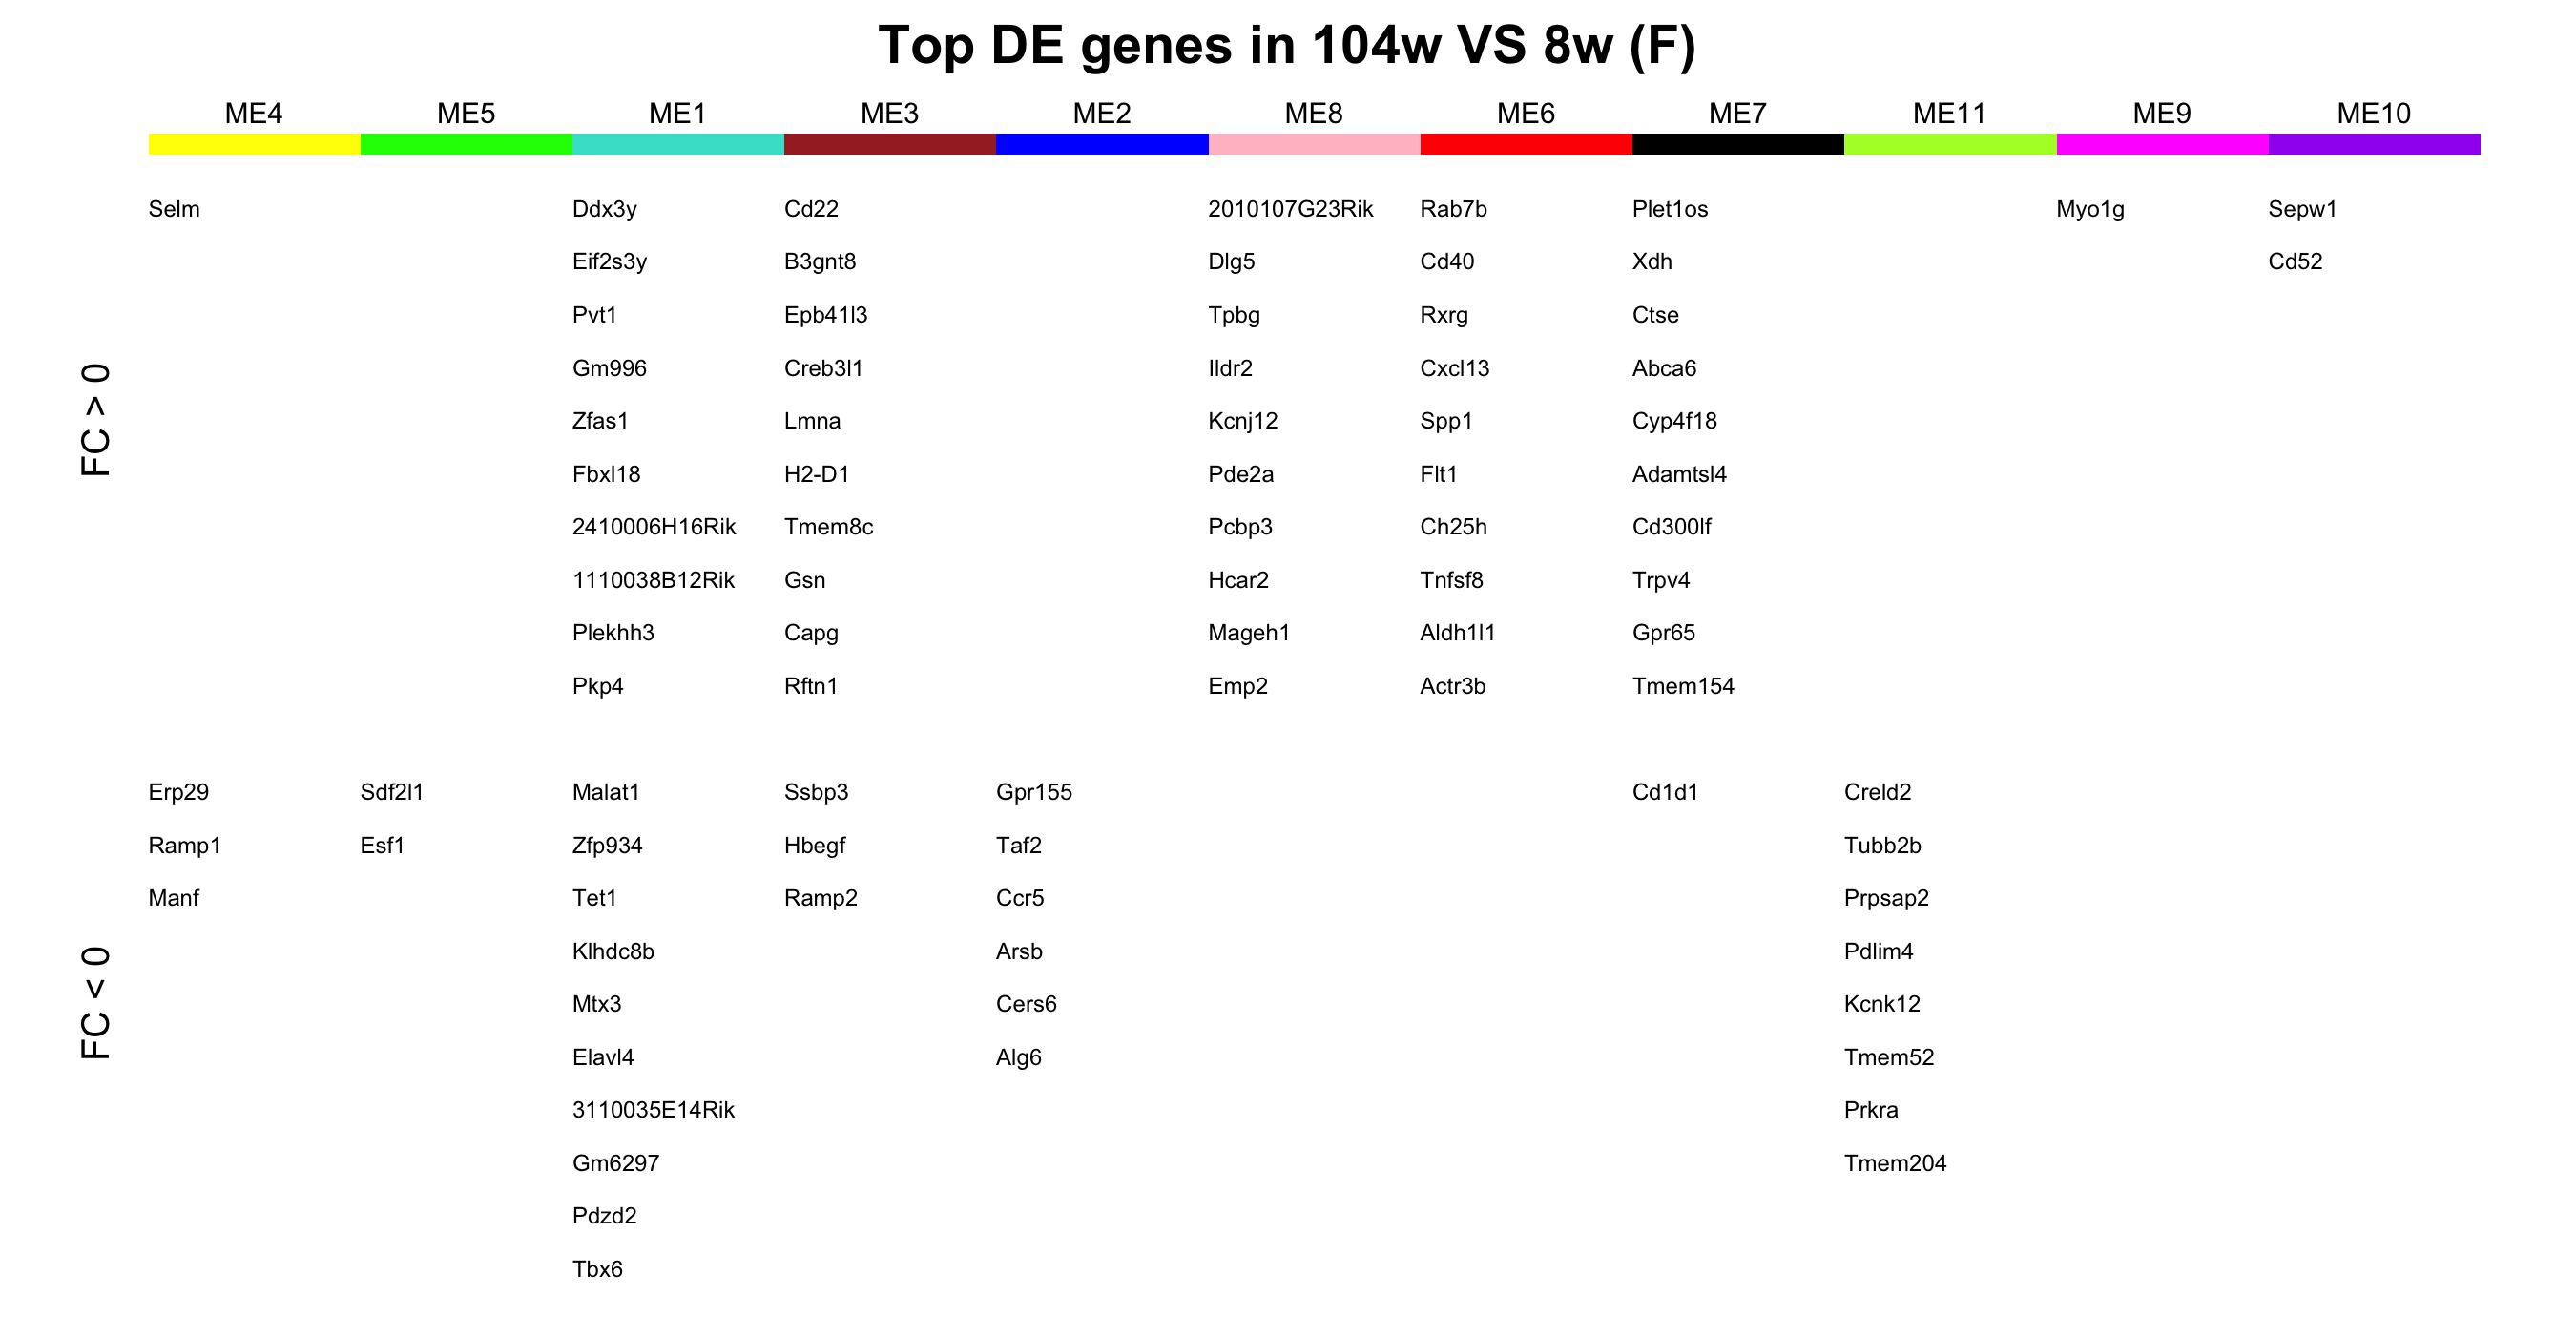

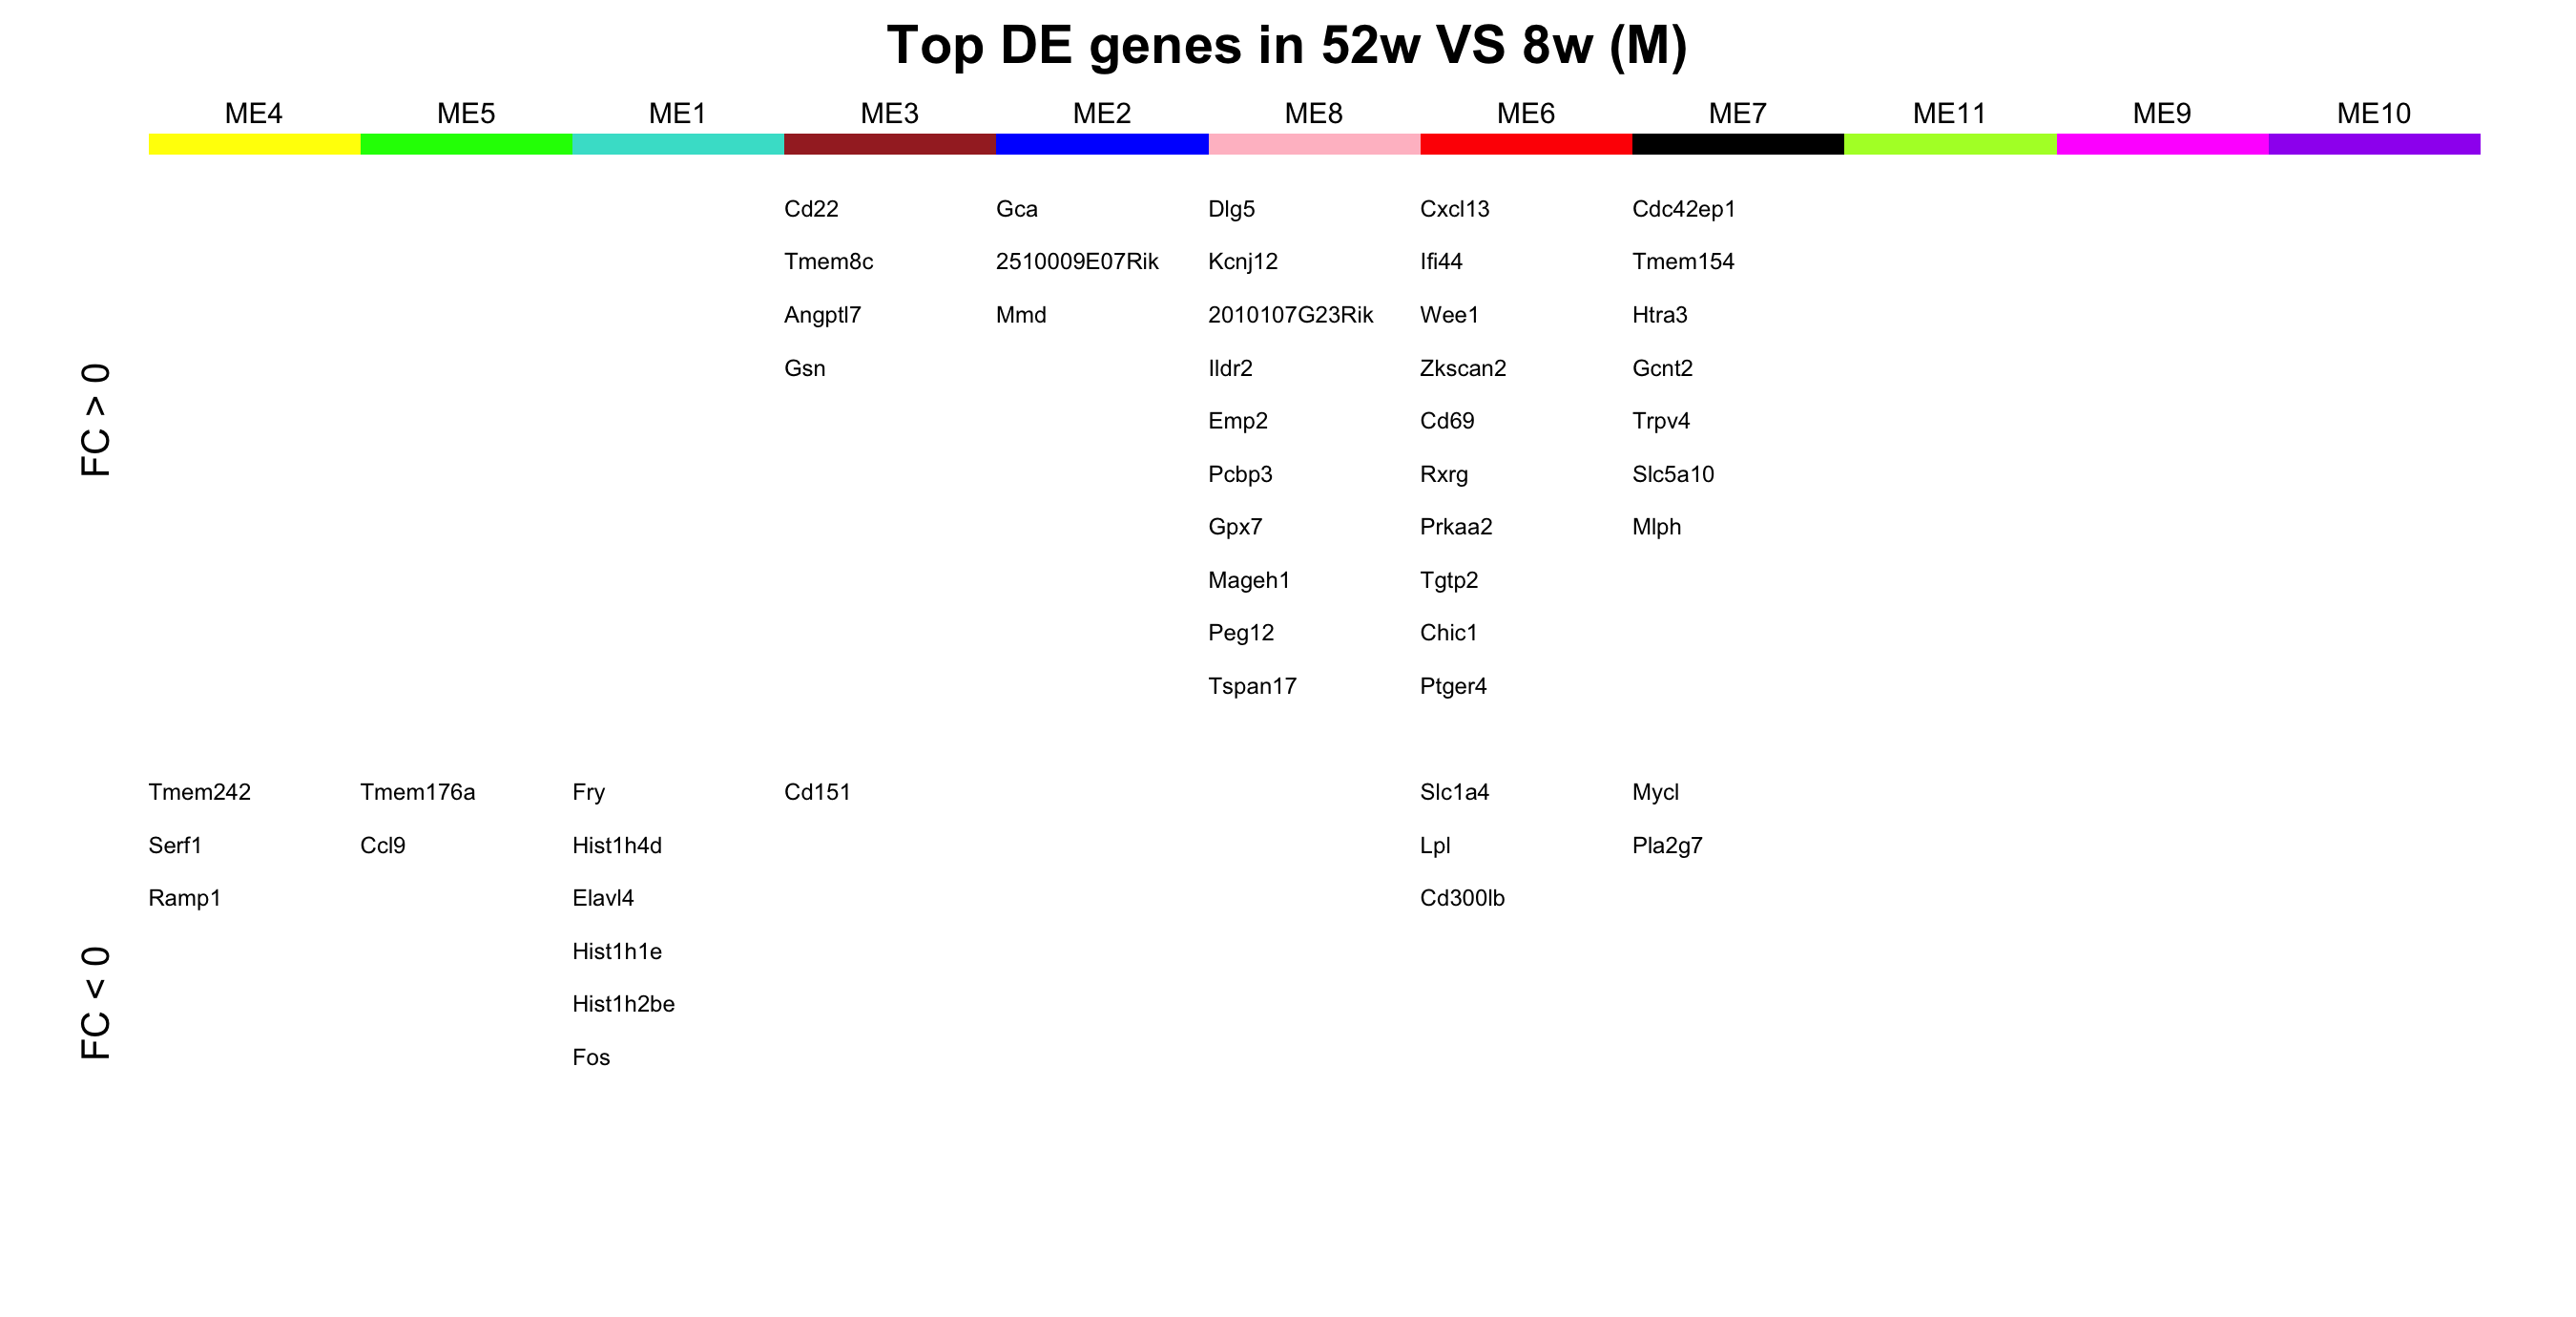

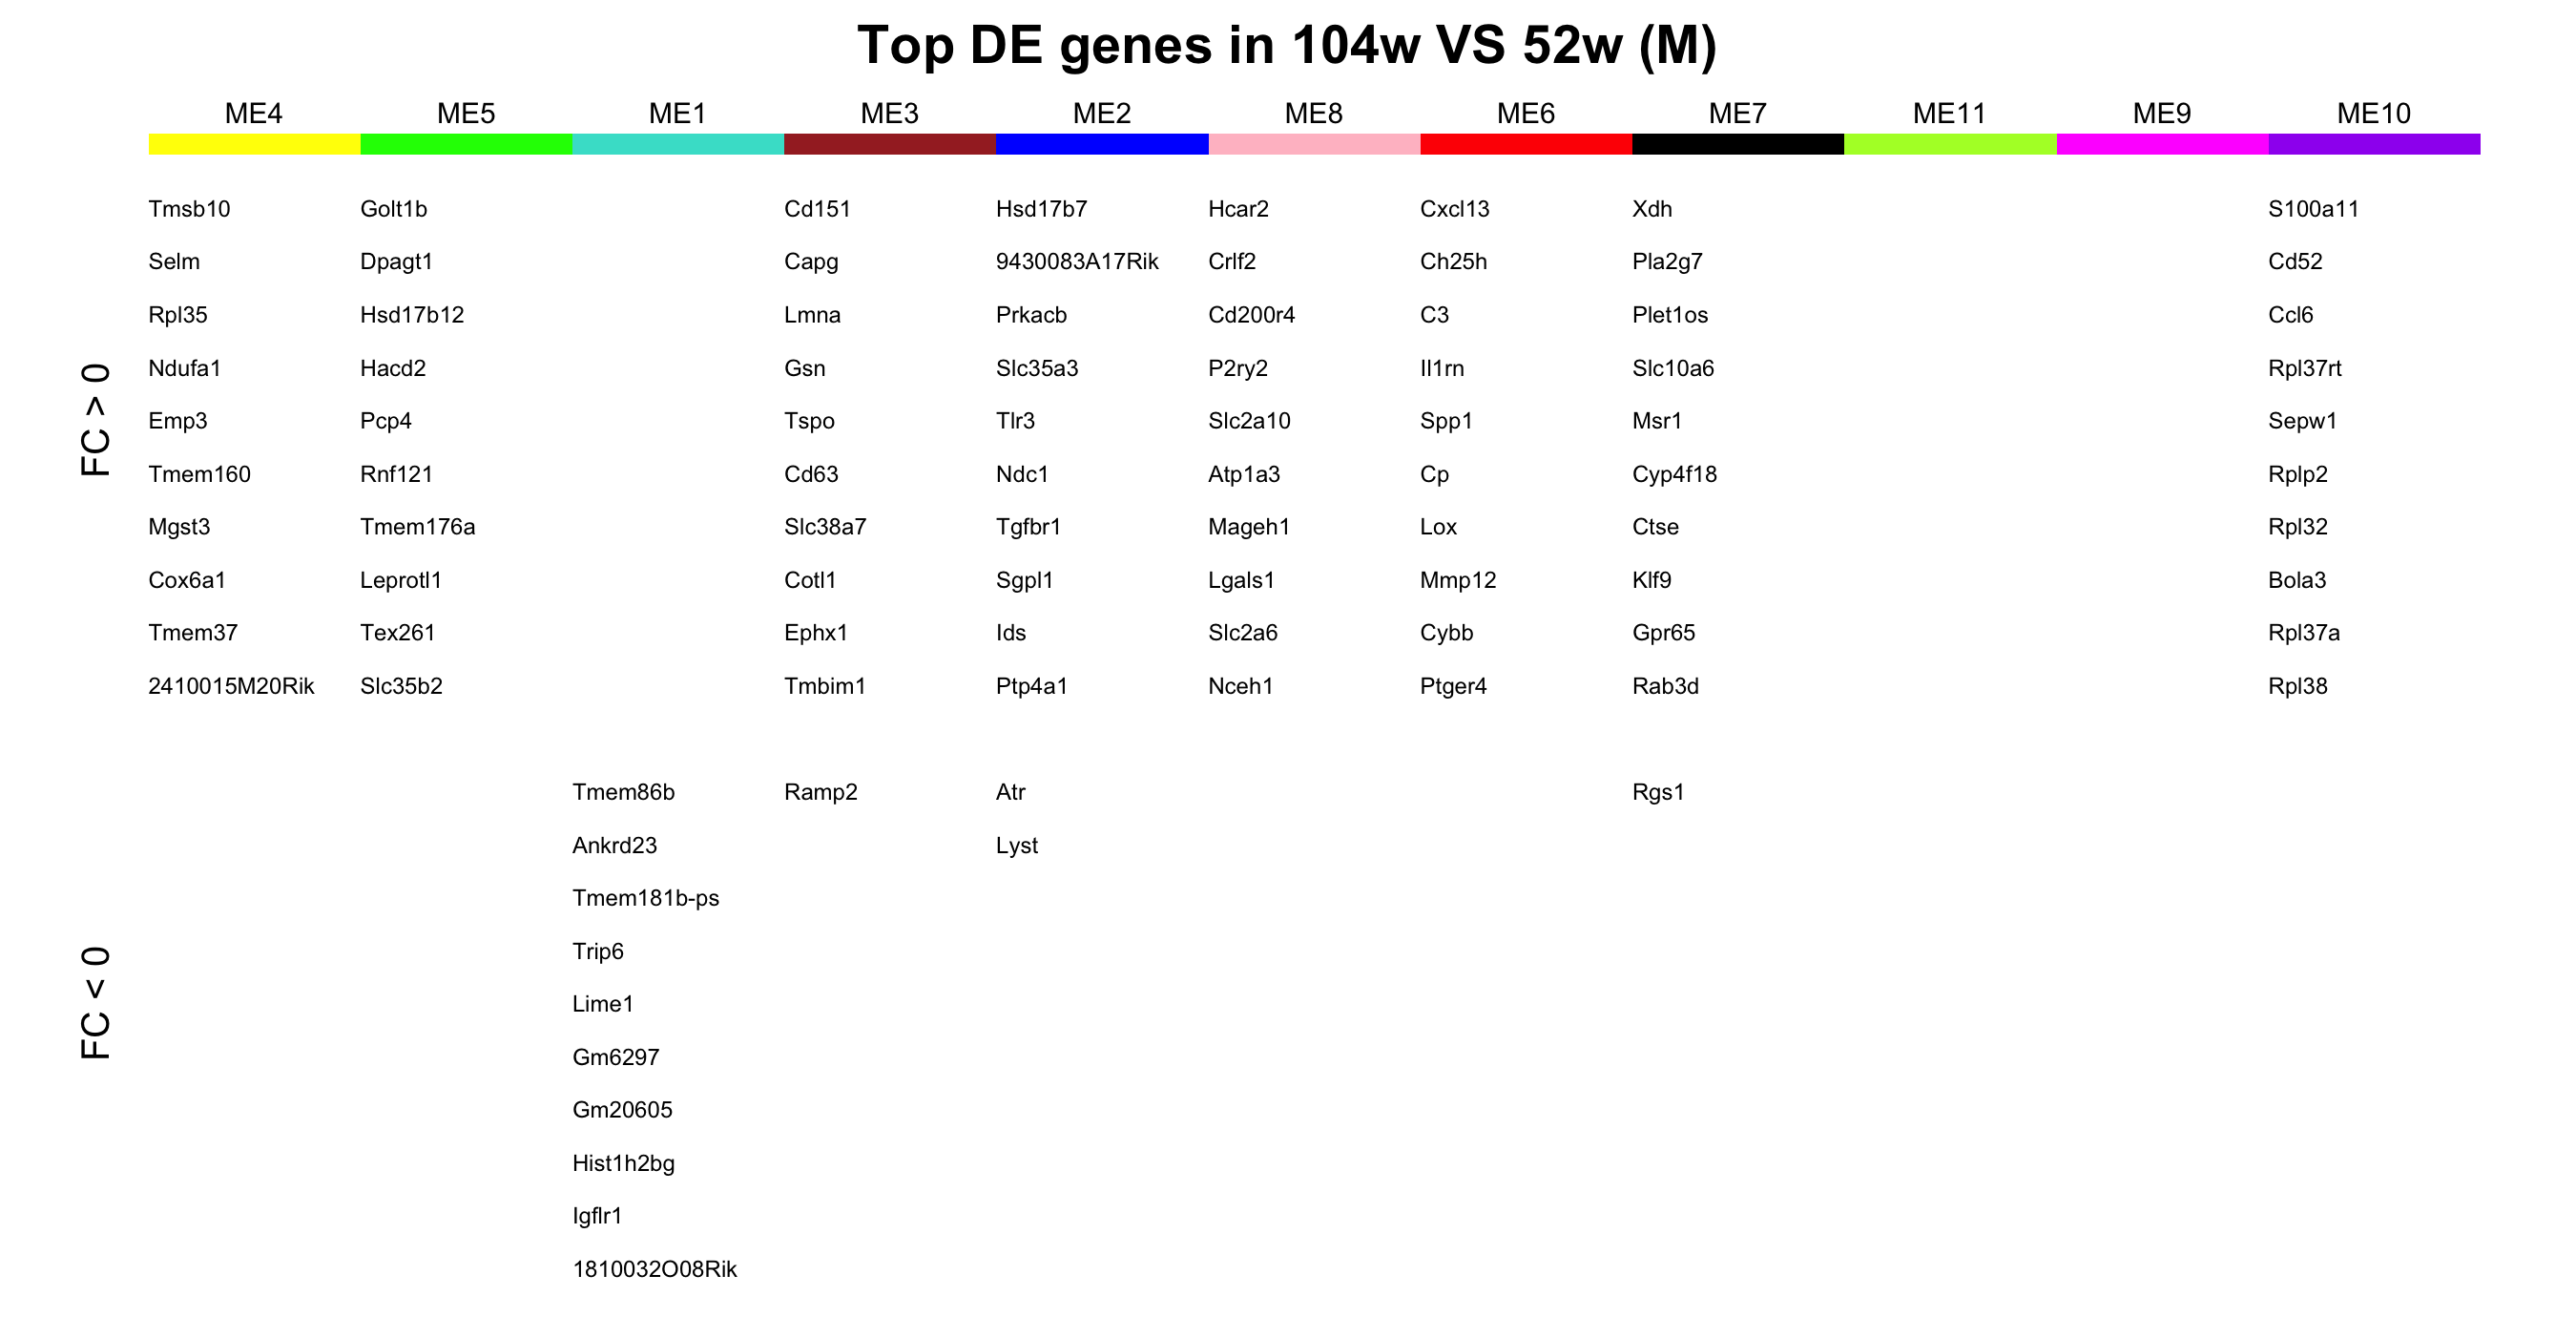

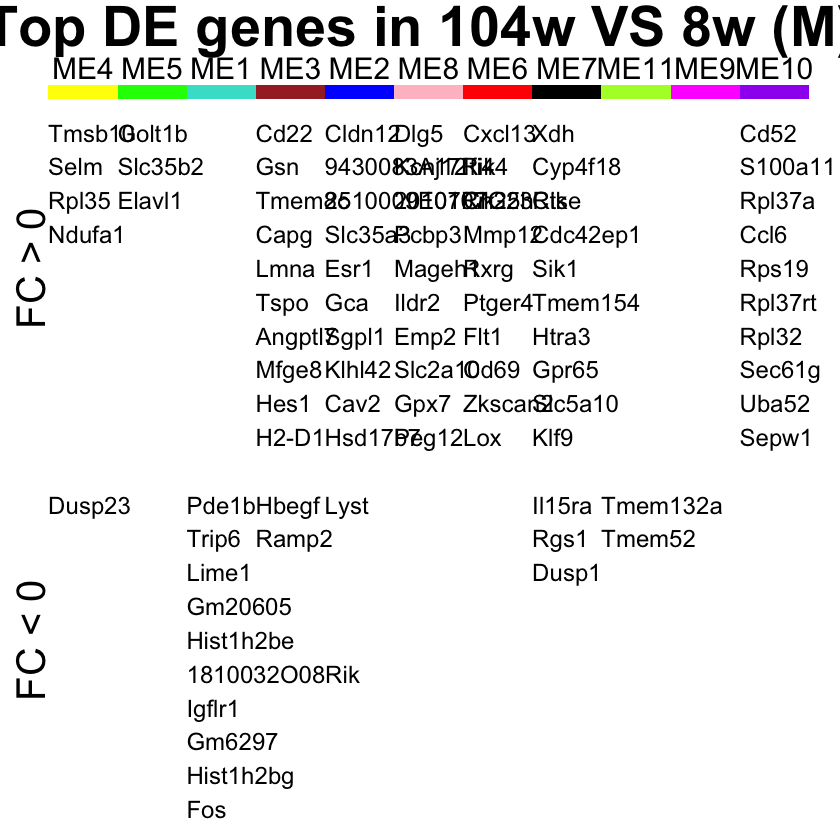

In [263]:
for(comp in names(comps)){
    plot_top_deg_in_modules(age_gender_deg$sign_fc_deg, comp, connected_gene_colors)
}

# GO analysis

In [238]:
full_go_desc = age_gender_deg$GO_wall[[1]][,"term"]
names(full_go_desc) = age_gender_deg$GO_wall[[1]][,"category"]
comp = colnames(age_gender_deg$over_represented_GO)
comp = comp[4:length(comp)]

## Biological process

Dot-plot with the most over-represented BP GO (20 most significant p-values for the different comparison)

Using term, id as id variables
Using term, id as id variables


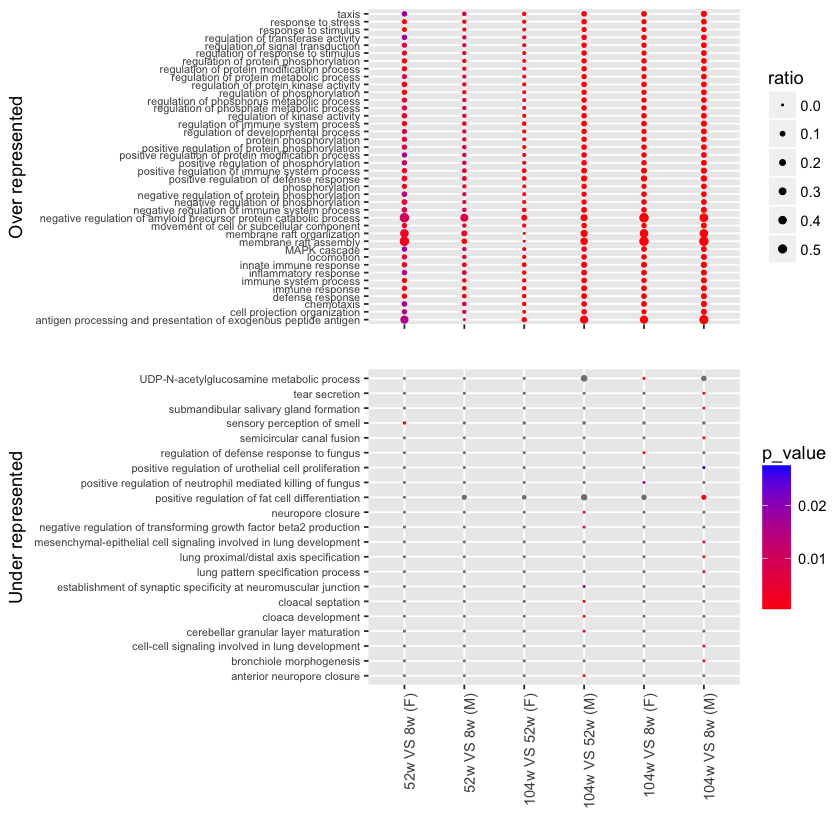

In [239]:
plot_top_go(age_gender_deg, "BP", 40)

Network based on description similarity

In [240]:
BP_network = create_GO_network(age_gender_deg, "BP", BP_GO)

Comp | Male | Female
--- | --- | ---
52w vs 8w | |
104w vs 52w | |
104w vs 8w | |

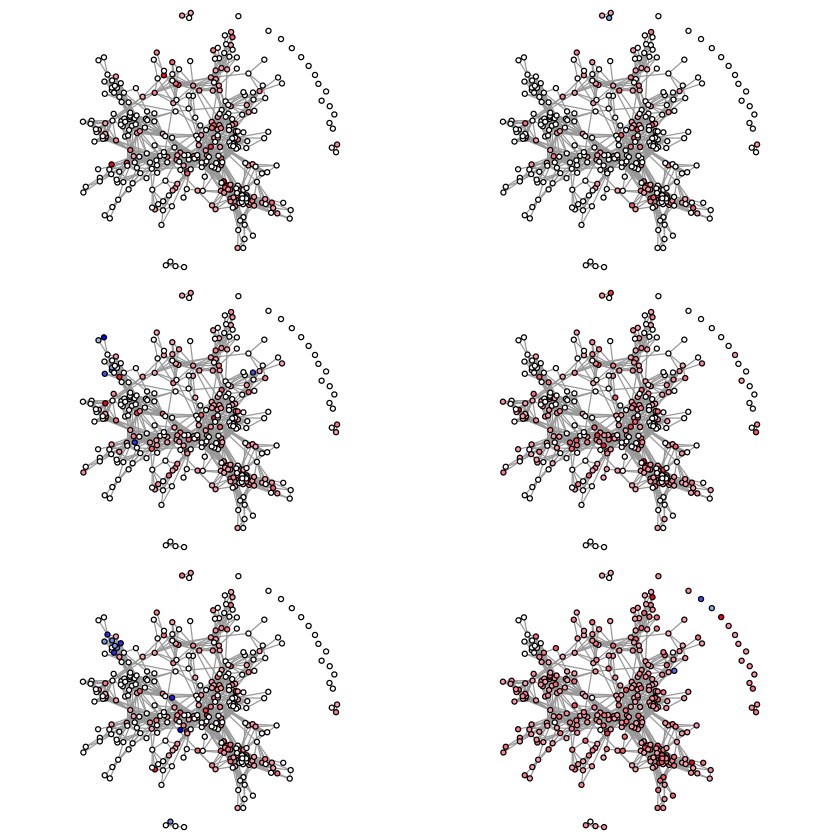

In [241]:
par(mfrow=c(3,2),mar=c(0,0,0,0))
plot_GO_networks(BP_network, "52w VS 8w (M)", full_go_desc, plot_interactive = FALSE)
plot_GO_networks(BP_network, "52w VS 8w (F)", full_go_desc, plot_interactive = FALSE)
plot_GO_networks(BP_network, "104w VS 52w (M)", full_go_desc, plot_interactive = FALSE)
plot_GO_networks(BP_network, "104w VS 52w (F)", full_go_desc, plot_interactive = FALSE)
plot_GO_networks(BP_network, "104w VS 8w (M)", full_go_desc, plot_interactive = FALSE)
plot_GO_networks(BP_network, "104w VS 8w (F)", full_go_desc, plot_interactive = FALSE)

### 52w VS 8w (F)

In [242]:
# 52w VS 8w (F)
#plot_GO_networks(BP_network, "52w VS 8w (F)", full_go_desc, plot_non_interactive = FALSE)
col = get_GO_network_col(BP_network, "52w VS 8w (F)")
dotRes = getAmigoTree(goIDs=names(col),
                      color=col,
                      filename="../results/dge/age-effect/age_gender/go/52w_VS_8w_F",
                      picType="png",
                      saveResult=TRUE)

![](../results/dge/age-effect/age_gender/go/52w_VS_8w_F.png)

GO Tree at "../results/dge/age-effect/age_gender/go/52w_VS_8w_F.png"

### 52w VS 8w (M)

In [243]:
# 52w VS 8w (M)
# plot_GO_networks(BP_network, "52w VS 8w (M)", full_go_desc, plot_non_interactive = FALSE)
col = get_GO_network_col(BP_network, "52w VS 8w (M)")
dotRes = getAmigoTree(goIDs=names(col),
                      color=col,
                      filename="../results/dge/age-effect/age_gender/go/52w_VS_8w_M",
                      picType="png",
                      saveResult=TRUE)

![](../results/dge/age-effect/age_gender/go/52w_VS_8w_M.png)

GO Tree at "../results/dge/age-effect/age_gender/go/52w_VS_8w_M.png"

### 104w VS 52w (F)

In [244]:
# 104w VS 52w (F)
# plot_GO_networks(BP_network, "104w VS 52w (F)", full_go_desc, plot_non_interactive = FALSE)
col = get_GO_network_col(BP_network, "104w VS 52w (F)")
dotRes = getAmigoTree(goIDs=names(col),
                      color=col,
                      filename="../results/dge/age-effect/age_gender/go/104w_VS_52w_F",
                      picType="png",
                      saveResult=TRUE)

![](../results/dge/age-effect/age_gender/go/104w_VS_52w_F.png)

GO Tree at "../results/dge/age-effect/age_gender/go/104w_VS_52w_F.png"

### 104w VS 52w (M)

In [245]:
# 104w VS 52w (M)
# plot_GO_networks(BP_network, "104w VS 52w (M)", full_go_desc, plot_non_interactive = FALSE)
col = get_GO_network_col(BP_network, "104w VS 52w (M)")
dotRes = getAmigoTree(goIDs=names(col),
                      color=col,
                      filename="../results/dge/age-effect/age_gender/go/104w_VS_52w_M",
                      picType="png",
                      saveResult=TRUE)

![](../results/dge/age-effect/age_gender/go/104w_VS_52w_M.png)

GO Tree at "../results/dge/age-effect/age_gender/go/104w_VS_52w_M.png"

## Cellular components

Dot-plot with the most over-represented CC GO (20 most significant p-values for the different comparison)

Using term, id as id variables
Using term, id as id variables


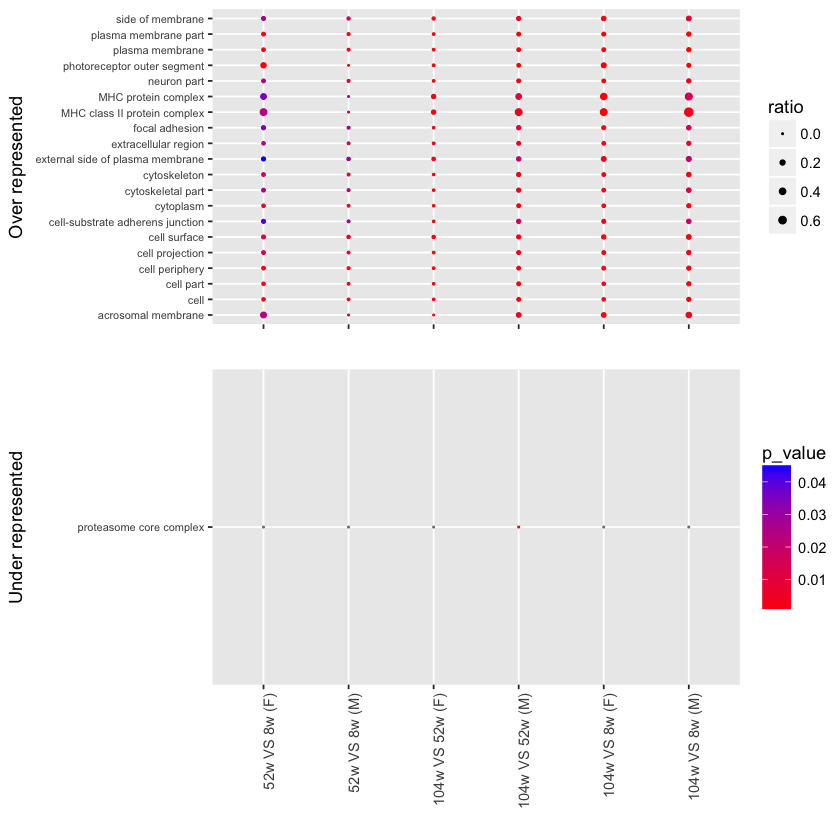

In [246]:
plot_top_go(age_gender_deg,
            "CC",
            20)

In [247]:
CC_network = create_GO_network(age_gender_deg, "CC", CC_GO)

Comp | Female | Male
--- | --- | ---
52w vs 8w | |
104w vs 52w | |
104w vs 8w | |

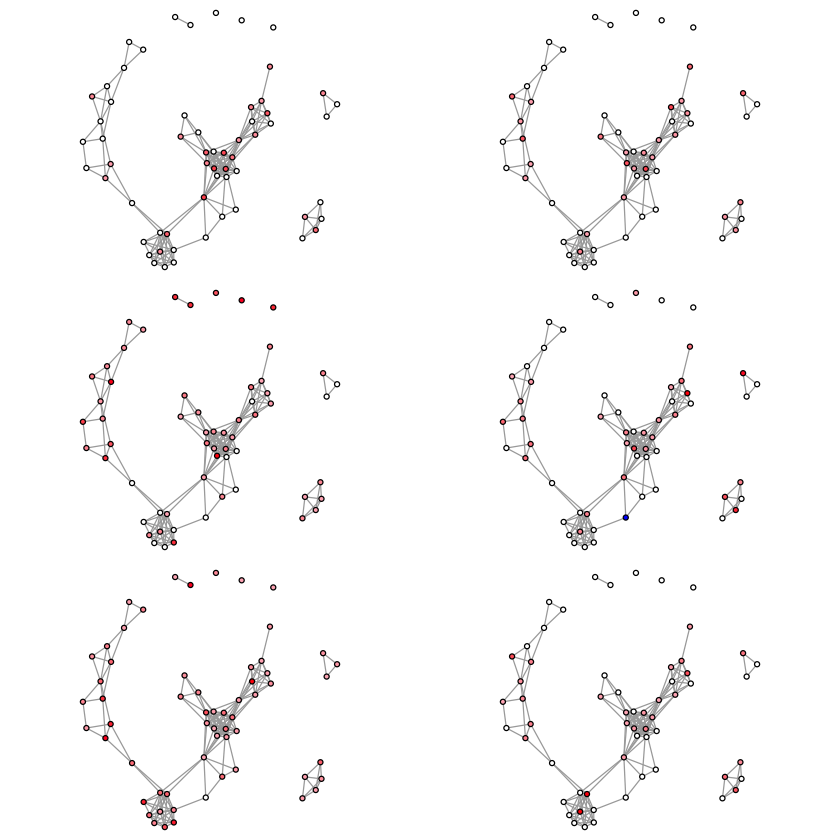

In [248]:
par(mfrow=c(3,2),mar=c(0,0,0,0))
plot_GO_networks(CC_network, "52w VS 8w (F)", full_go_desc, plot_interactive = FALSE)
plot_GO_networks(CC_network, "52w VS 8w (M)", full_go_desc, plot_interactive = FALSE)
plot_GO_networks(CC_network, "104w VS 52w (F)", full_go_desc, plot_interactive = FALSE)
plot_GO_networks(CC_network, "104w VS 52w (M)", full_go_desc, plot_interactive = FALSE)
plot_GO_networks(CC_network, "104w VS 8w (F)", full_go_desc, plot_interactive = FALSE)
plot_GO_networks(CC_network, "104w VS 8w (M)", full_go_desc, plot_interactive = FALSE)

## Molecular functions

Dot-plot with the most over-represented MF GO (20 most significant p-values for the different comparison)

Using term, id as id variables
Using term, id as id variables


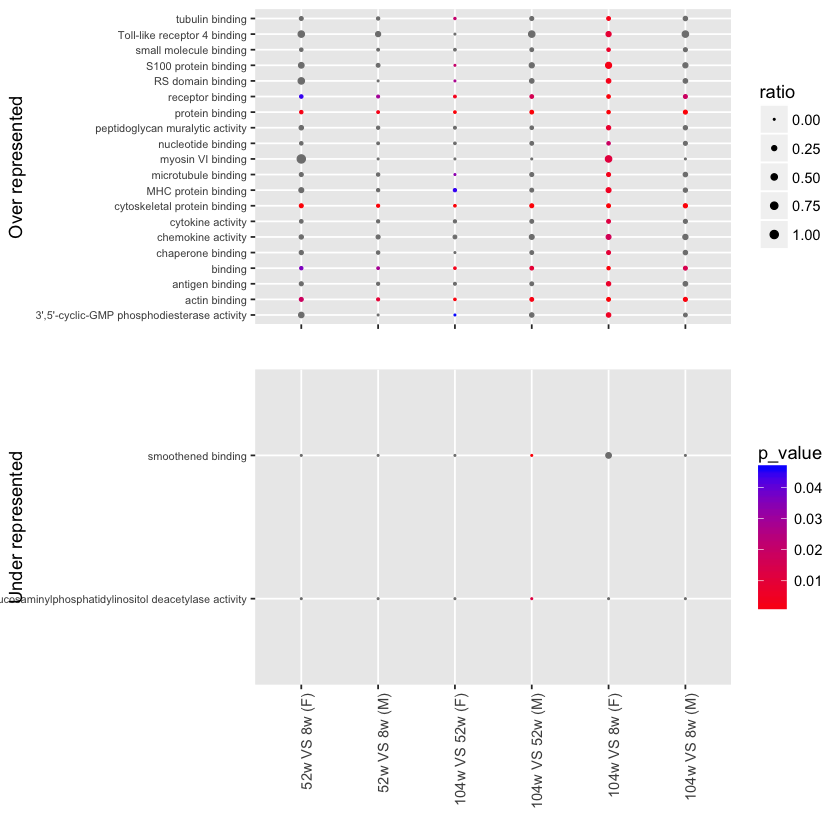

In [249]:
plot_top_go(age_gender_deg, "MF", 20)

In [250]:
MF_network = create_GO_network(age_gender_deg, "MF", MF_GO)

Comp | Female | Male
--- | --- | ---
52w vs 8w | |
104w vs 52w | |
104w vs 8w | |

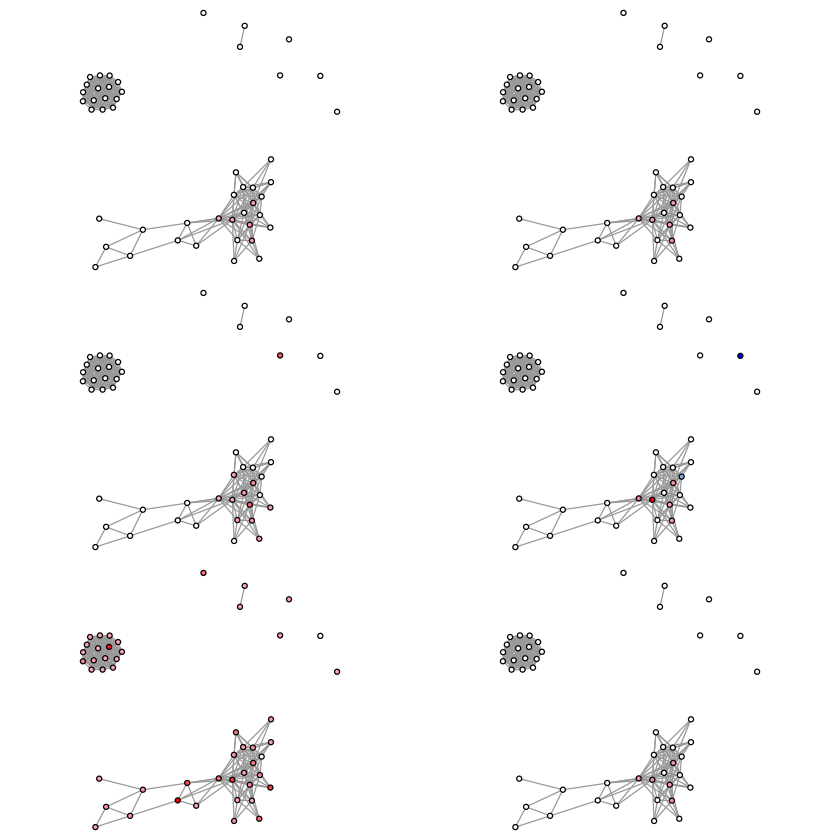

In [251]:
par(mfrow=c(3,2),mar=c(0,0,0,0))
plot_GO_networks(MF_network, "52w VS 8w (F)", full_go_desc, plot_interactive = FALSE)
plot_GO_networks(MF_network, "52w VS 8w (M)", full_go_desc, plot_interactive = FALSE)
plot_GO_networks(MF_network, "104w VS 52w (F)", full_go_desc, plot_interactive = FALSE)
plot_GO_networks(MF_network, "104w VS 52w (M)", full_go_desc, plot_interactive = FALSE)
plot_GO_networks(MF_network, "104w VS 8w (F)", full_go_desc, plot_interactive = FALSE)
plot_GO_networks(MF_network, "104w VS 8w (M)", full_go_desc, plot_interactive = FALSE)

# KEGG pathways

In [252]:
plot_kegg_pathways(age_gender_deg$over_represented_KEGG[,"category"],
                   age_gender_deg$fc_deg,
                   "../results/dge/age-effect/age_gender/kegg/over_repr_kegg/")

ERROR: Error in `$<-.data.frame`(`*tmp*`, labels, value = c("", "", "", "", "", : replacement has 12 rows, data has 28


In [ ]:
plot_kegg_pathways(age_gender_deg$under_represented_KEGG[,"category"],
                   age_gender_deg$fc_deg,
                   "../results/dge/age-effect/age_gender/kegg/under_repr_kegg/")

# Gender differences in aging

Question: Is there differences in aging between gender? Is there really a delay for some genes in male?

| 52w vs 8w for F | 52w vs 8w for M | 104w vs 52w for F | 104w vs 52w for M | Gene number
--- | --- | --- | --- | --- | ---
Set 1 | != | == | == | != | 729
Set 2 | == | != | != | == | 9

Gene number
Set 1 676        
Set 2   3

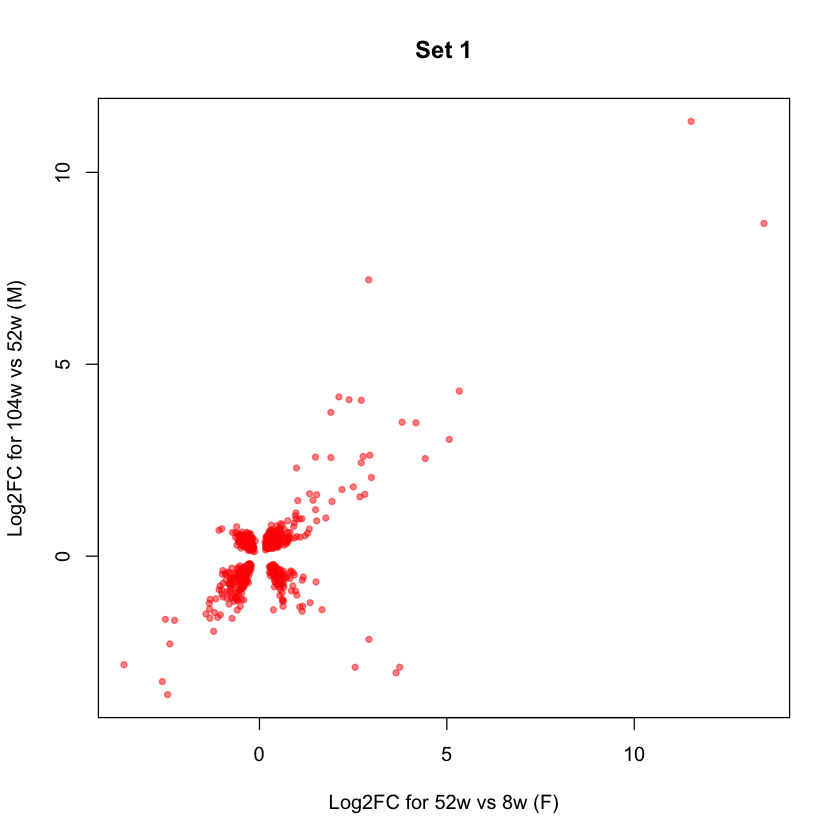

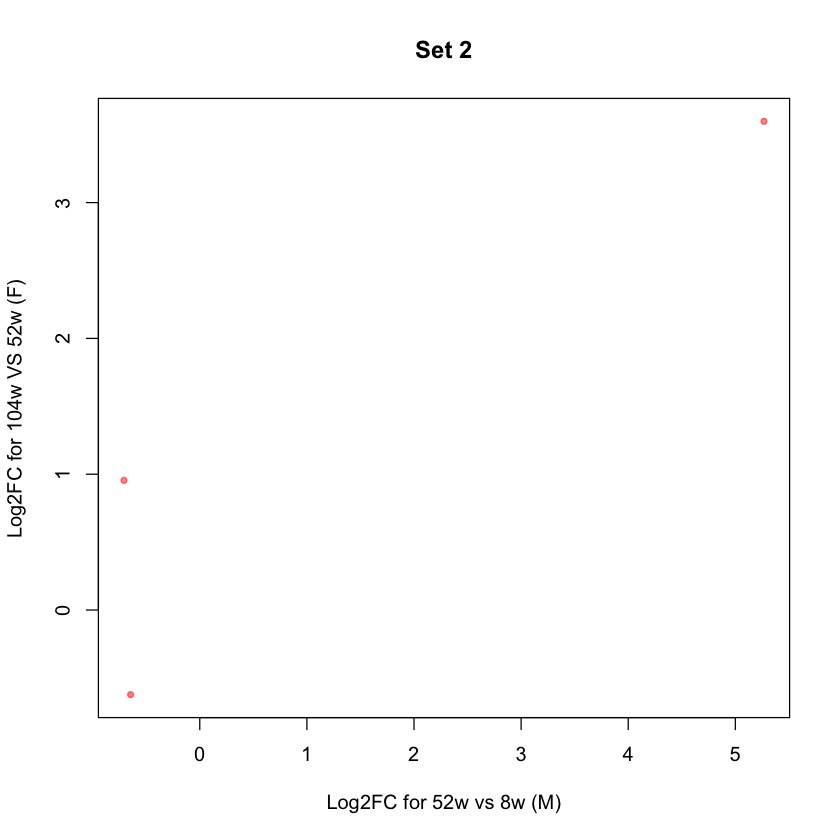

In [253]:
# set extractions
set1 = rownames(age_gender_deg$fc_deg[!is.na(age_gender_deg$fc_deg[,1]) & is.na(age_gender_deg$fc_deg[,2]) & is.na(age_gender_deg$fc_deg[,3]) & !is.na(age_gender_deg$fc_deg[,4]),])
set2 = rownames(age_gender_deg$fc_deg[is.na(age_gender_deg$fc_deg[,1]) & !is.na(age_gender_deg$fc_deg[,2]) & !is.na(age_gender_deg$fc_deg[,3]) & is.na(age_gender_deg$fc_deg[,4]),])
# gene numbers
res = matrix(0,ncol = 1, nrow=2, dimnames=list(c("Set 1", "Set 2"),c("Gene number")))
res[1,1] = length(set1)
res[2,1] = length(set2)
res
# log2FC
set1_fc = age_gender_deg$fc_deg[set1,]
set1_fc[is.na(set1_fc)] = 0
set2_fc = age_gender_deg$fc_deg[set2,]
set2_fc[is.na(set2_fc)] = 0
# plots of the differences
plot(set1_fc[,"52w VS 8w (F)"], set1_fc[,"104w VS 52w (M)"], main="Set 1", xlab = "Log2FC for 52w vs 8w (F)", ylab= "Log2FC for 104w vs 52w (M)", pch = 20, col = rgb(1,0,0,alpha=0.5))
plot(set2_fc[,"52w VS 8w (M)"], set2_fc[,"104w VS 52w (F)"], main="Set 2", xlab = "Log2FC for 52w vs 8w (M)", ylab= "Log2FC for 104w VS 52w (F)", pch = 20, col = rgb(1,0,0,alpha=0.5))

## Genes with differential expression delayed in male

Genes (set 1):
- Differentially expressed between 52w and 8w in F
- Not differentially expressed between 104w and 52w in F
- Not differentially expressed between 52w and 8w in M
- Differentially expressed between 104w and 52w in M
- No criteria for 104w vs 8w in both F and M

![](../doc/images/male_delayed_gene_analysis_explanation.png)

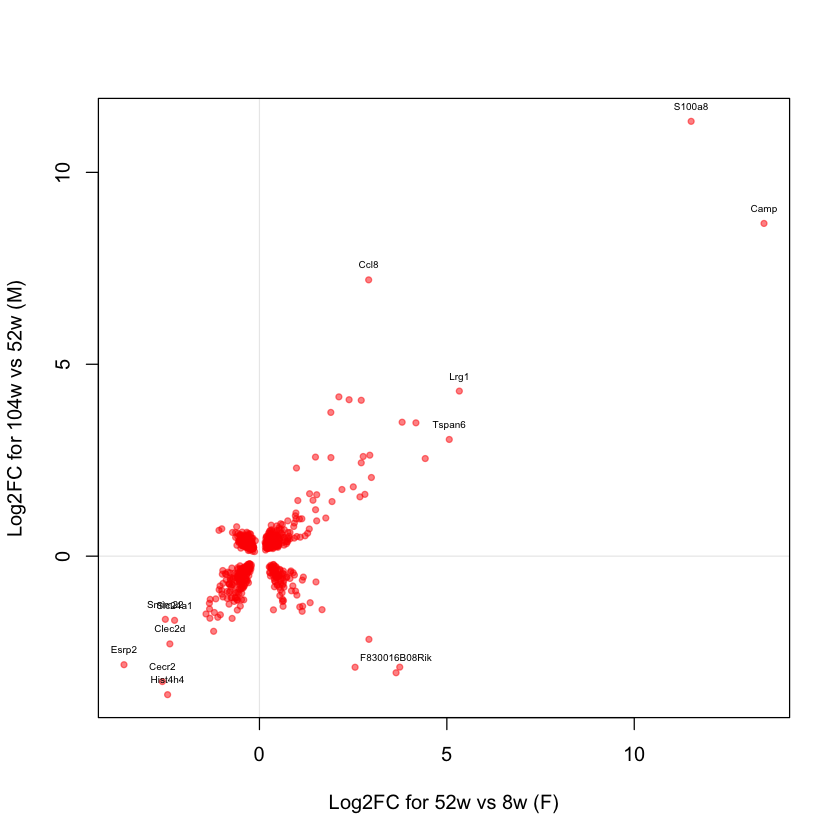

In [254]:
# How the genes changed in the first phase (between 8w and 52w) in Female change in the second phase (between 52w and 104w) for the Male
aging_gender_diff = cbind(set1_fc[,"52w VS 8w (F)"], set1_fc[,"104w VS 52w (M)"])
colnames(aging_gender_diff) = c("52w VS 8w (F)","104w VS 52w (M)")
lim = c(min(aging_gender_diff), max(aging_gender_diff))
plot(aging_gender_diff, xlab = "Log2FC for 52w vs 8w (F)", ylab= "Log2FC for 104w vs 52w (M)", pch = 20, col = rgb(1,0,0,alpha=0.5))
abline(h = 0, col = rgb(0,0,0,alpha=0.1))
abline(v = 0, col = rgb(0,0,0,alpha=0.1))
# extract extreme genes
extr = aging_gender_diff[aging_gender_diff[,1]>5 | aging_gender_diff[,1]<(-2) | aging_gender_diff[,2]>5 | aging_gender_diff[,2]<(-3),]
text(extr[,1],extr[,2], labels = rownames(extr), pos=3, cex=0.5)

### 52w VS 8w (F) > 0 and 104w VS 52w (M) > 0

In [255]:
# 52w VS 8w (F) > 0 and 104w VS 52w (M) > 0
F_pos_M_pos_set_1 = aging_gender_diff[aging_gender_diff[,"52w VS 8w (F)"]>0 & aging_gender_diff[,"104w VS 52w (M)"]>0,]
investigate_gene_set(F_pos_M_pos_set_1)
#investigate_enrichement(rownames(F_pos_M_pos_set_1),rownames(age_gender_deg$deg))

[1] 232

	Pearson's product-moment correlation

data:  mat[, 1] and mat[, 2]
t = 32.072, df = 230, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8773837 0.9251049
sample estimates:
      cor 
0.9040226 



### 52w VS 8w (F) > 0 and 104w VS 52w (M) < 0

In [256]:
# 52w VS 8w (F) > 0 and 104w VS 52w (M) < 0
F_pos_M_neg_set_1 = aging_gender_diff[aging_gender_diff[,"52w VS 8w (F)"]>0 & aging_gender_diff[,"104w VS 52w (M)"]<0,]
investigate_gene_set(F_pos_M_neg_set_1)
#investigate_enrichement(rownames(F_pos_M_neg_set_1),rownames(age_gender_deg$deg))

[1] 94

	Pearson's product-moment correlation

data:  mat[, 1] and mat[, 2]
t = -17.071, df = 92, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.9131327 -0.8127703
sample estimates:
       cor 
-0.8718158 



### 52w VS 8w (F) < 0 and 104w VS 52w (M) > 0

In [257]:
# 52w VS 8w (F) < 0 and 104w VS 52w (M) > 0
F_neg_M_pos_set_1 = aging_gender_diff[aging_gender_diff[,"52w VS 8w (F)"]<0 & aging_gender_diff[,"104w VS 52w (M)"]>0,]
investigate_gene_set(F_neg_M_pos_set_1)
#investigate_enrichement(rownames(F_neg_M_pos_set_1),rownames(age_gender_deg$deg))

[1] 181

	Pearson's product-moment correlation

data:  mat[, 1] and mat[, 2]
t = -9.1249, df = 179, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.6554453 -0.4549900
sample estimates:
       cor 
-0.5634548 



### 52w VS 8w (F) < 0 and 104w VS 52w (M) < 0

In [258]:
# 52w VS 8w (F) < 0 and 104w VS 52w (M) < 0
F_neg_M_neg_set_1 = aging_gender_diff[aging_gender_diff[,"52w VS 8w (F)"]<0 & aging_gender_diff[,"104w VS 52w (M)"]<0,]
investigate_gene_set(F_neg_M_neg_set_1)
#investigate_enrichement(rownames(F_neg_M_neg_set_1),rownames(age_gender_deg$deg))

[1] 169

	Pearson's product-moment correlation

data:  mat[, 1] and mat[, 2]
t = 18.845, df = 167, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.7695674 0.8676545
sample estimates:
      cor 
0.8247168 



### Summary

![](../results/dge/age-effect/age_gender/male_delayed_genes.png)

Comp | 52w VS 8w (F) < 0 | 52w VS 8w (F) > 0
--- | --- | ---
104w VS 52w (M) > 0 | |
104w VS 52w (M) < 0 | |

[1] 149

[1] 179

[1] 124

[1] 56

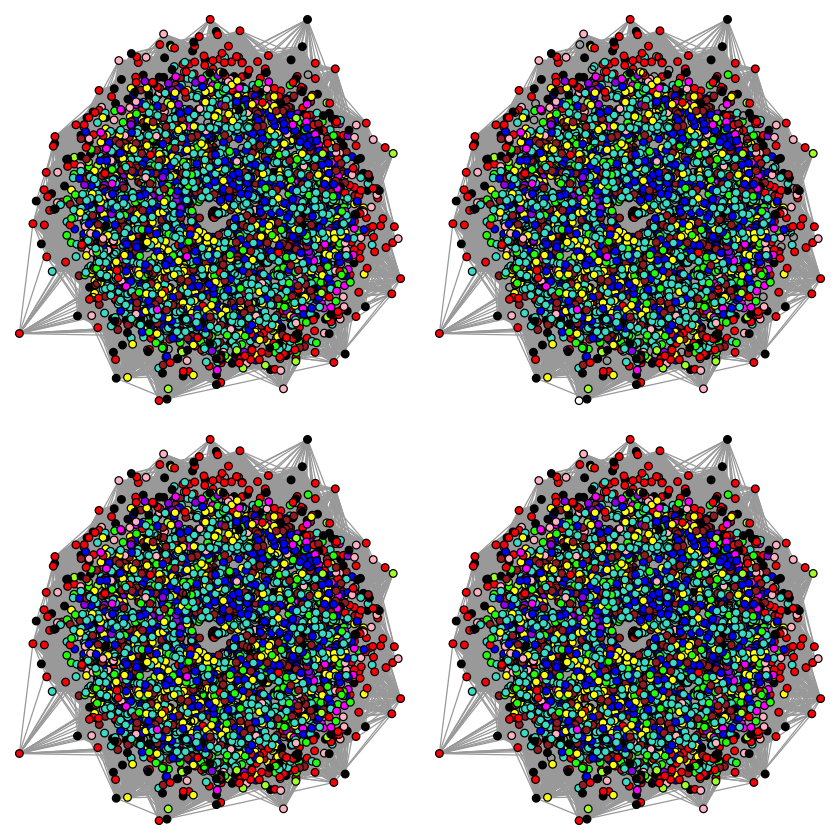

In [259]:
par(mfrow=c(2,2),mar=c(0,0,0,0))
# 52w VS 8w (F) < 0 and 104w VS 52w (M) > 0
F_neg_M_pos_set_1_col = connected_gene_colors
sum(names(F_neg_M_pos_set_1_col) %in% rownames(F_neg_M_pos_set_1))
F_neg_M_pos_set_1_col[which(names(F_neg_M_pos_set_1_col) %in% rownames(F_neg_M_pos_set_1))] = module_nb + 1
plot_net_with_layout(net, F_neg_M_pos_set_1_col, pal2, layout, add_legend = F)
# 52w VS 8w (F) > 0 and 104w VS 52w (M) > 0
F_pos_M_pos_set_1_col = connected_gene_colors
sum(names(F_pos_M_pos_set_1_col) %in% rownames(F_pos_M_pos_set_1))
F_pos_M_pos_set_1_col[which(names(F_pos_M_pos_set_1_col) %in% rownames(F_pos_M_pos_set_1))] = module_nb + 1
plot_net_with_layout(net, F_pos_M_pos_set_1_col, pal2, layout, add_legend = F)
# 52w VS 8w (F) < 0 and 104w VS 52w (M) < 0
F_neg_M_neg_set_1_col = connected_gene_colors
sum(names(F_neg_M_neg_set_1_col) %in% rownames(F_neg_M_neg_set_1))
F_neg_M_neg_set_1_col[which(names(F_neg_M_neg_set_1_col) %in% rownames(F_neg_M_neg_set_1))] = module_nb + 1
plot_net_with_layout(net, F_neg_M_neg_set_1_col, pal2, layout, add_legend = F)
# 52w VS 8w (F) > 0 and 104w VS 52w (M) < 0
F_pos_M_neg_set_1_col = connected_gene_colors
sum(names(F_pos_M_neg_set_1_col) %in% rownames(F_pos_M_neg_set_1))
F_pos_M_neg_set_1_col[which(names(F_pos_M_neg_set_1_col) %in% rownames(F_pos_M_neg_set_1))] = module_nb + 1
plot_net_with_layout(net, F_pos_M_neg_set_1_col, pal2, layout, add_legend = F)

## Genes with differential expression delayed in female

Genes (set 2):
- Not differentially expressed between 52w and 8w in F
- Differentially expressed between 104w and 52w in F
- Differentially expressed between 52w and 8w in M
- Not differentially expressed between 104w and 52w in M
- No criteria for 104w vs 8w in both F and M

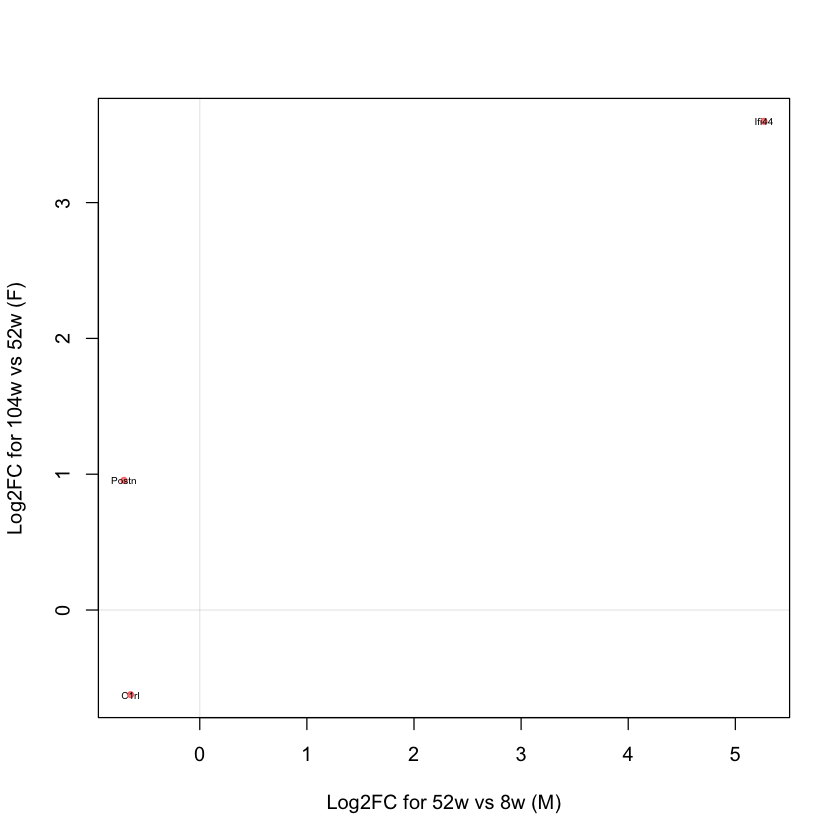

In [260]:
# How the genes changed in the first phase (between 8w and 52w) in Male change in the second phase (between 52w and 104w) for the Female
aging_gender_diff = cbind(set2_fc[,"52w VS 8w (M)"], set2_fc[,"104w VS 52w (F)"])
colnames(aging_gender_diff) = c("52w VS 8w (M)","104w VS 52w (F)")
lim = c(min(aging_gender_diff), max(aging_gender_diff))
plot(aging_gender_diff, xlab = "Log2FC for 52w vs 8w (M)", ylab= "Log2FC for 104w vs 52w (F)", pch = 20, col = rgb(1,0,0,alpha=0.5))
abline(h = 0, col = rgb(0,0,0,alpha=0.1))
abline(v = 0, col = rgb(0,0,0,alpha=0.1))
# extract extreme genes
#extr = aging_gender_diff[aging_gender_diff[,1]>5 | aging_gender_diff[,1]<(-2) | aging_gender_diff[,2]>5 | aging_gender_diff[,2]<(-3),]
text(aging_gender_diff[,1],aging_gender_diff[,2], labels = rownames(aging_gender_diff), cex=0.5)

In [261]:
set_2_col = connected_gene_colors
sum(names(set_2_col) %in% rownames(aging_gender_diff))
#set_2_col[which(names(set_2_col) %in% rownames(aging_gender_diff))] = module_nb + 1
#plot_net_with_layout(net, set_2_col, pal2, layout)

[1] 1